# Bank Loan Case study

**Problem Statement**:

This case study, as a business, will be closed out because the applicant is unable to repay the loan. Here, we make an effort to identify patterns that can indicate that a client's credit history is not optimal using EDA. We may use the conclusion reached by EDA to guide our decisions on their loan application. 
<br><br>


## 1. Importing useful Libraries

In [ ]:
# importing necessary libraries
import numpy as np 
import pandas as pd    
import matplotlib.pyplot as plt
import seaborn as sns   # For Data Visualization 

import warnings   #Filtering out the warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",300)    #to display all the columns
pd.set_option("display.max_rows",300)   #to display all the rows

## 2. Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the application_data.csv file to dataframe using read_csv
app_df=pd.read_csv('/content/drive/MyDrive/application_data.csv')

# reading the previous_application.csv file to dataframe using read_csv
prev_ap_df = pd.read_csv('/content/drive/MyDrive/previous_application.csv')

## 3. Checking the structure of the data

In [ ]:
# top 5 rows in applications
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [ ]:
# no of rows and columns in applications
app_df.shape

(307511, 122)

**Observations**: Applications dataset has 306667 rows and 122 features

### 3.1 Managing inaccurate data types in app_df

In [ ]:
# checking the data types if there are any incorrect ones
app_df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

**Observations**: 
No concerning case seems to be present here.

In [ ]:
# Statistical summary of the applications dataset
app_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

## 4. Indentifying and handling missing data

### 4.1 Missing percentage

In [ ]:
# percentage of missing data in each column in applications dataset
(app_df.isna().sum()/len(app_df)*100).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

**Observations**:

*   The dataset has several columns with missing values..
*   These variables' share of missing values fluctuates considerably.
*   We intend to remove features with a significant percentage of missing values.
*   We are using 50% as the threshold value..

### 4.2 Handling Missing values<br>


In [ ]:
# removing features crossing our missing values' threshold
app_df= app_df.loc[:, (app_df.isna().sum()/len(app_df)*100) < 50]   

In [ ]:
# the number of rows and columns left after deleting columns with threshold corssing missing value
app_df.shape

(307511, 81)

**Observations**: 
* 41 such features had threshold crossing missing values percentage 
* After cleaning the same we're left with 81 features

In [ ]:
# checking the updated percentage of missing values in each column
app_df.isna().sum()/len(app_df)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [ ]:
# getting features with null values within the range of 0% to 40%
temp_var=app_df.columns[((app_df.isnull().sum()/len(app_df)*100) <= 40) & ((app_df.isnull().sum()/len(app_df)*100) > 0)]
print(temp_var)
print(len(temp_var))

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')
18


<b>Observations</b>: 
* 18 features in our data set had null values larger than 0% but less than or equal to 40%.<br>
* AMT_ANNUITY : using the median to impute missing numbers where there are outliers AMT_ANNUITY
* AMT_GOODS_PRICE : using the median to impute missing numbers where there are outliers in AMT_GOODS_PRICE
* NAME_TYPE_SUITE : using the mode to impute missing entries NAME_TYPE_SUITE as it is categorical data not numerical
* OCCUPATION_TYPE : using the 'Others' to impute missing entries in OCCUPATION_TYPE as it is categorical data
* EXT_SOURCE_2 : remove this feature
* EXT_SOURCE_3 : remove this feature
* CNT_FAM_MEMBERS : deleting the row sonce the count of null values is only 2, and it wouldnt have much impact on overall data
* OBS_30_CNT_SOCIAL_CIRCLE : using the median to impute missing numbers where there are outliers in OBS_30_CNT_SOCIAL_CIRCLE
* DEF_30_CNT_SOCIAL_CIRCLE : using the median to impute missing numbers where there are outliers in DEF_30_CNT_SOCIAL_CIRCLE
* OBS_60_CNT_SOCIAL_CIRCLE : using the median to impute missing numbers where there are outliers in OBS_60_CNT_SOCIAL_CIRCLE
* DEF_60_CNT_SOCIAL_CIRCLE : using the median to impute missing numbers where there are outliers in DEF_60_CNT_SOCIAL_CIRCLE
* DAYS_LAST_PHONE_CHANGE : impute with 0 (meaning no data)
* AMT_REQ_CREDIT_BUREAU_HOUR : using the median to impute missing numbers where there are outliers in AMT_REQ_CREDIT_BUREAU_HOUR
* AMT_REQ_CREDIT_BUREAU_DAY : using the median to impute missing numbers where there are outliers in AMT_REQ_CREDIT_BUREAU_DAY
* AMT_REQ_CREDIT_BUREAU_WEEK : using the median to impute missing numbers where there are outliers in AMT_REQ_CREDIT_BUREAU_WEEK
* AMT_REQ_CREDIT_BUREAU_MON : using the median to impute missing numbers where there are outliers in AMT_REQ_CREDIT_BUREAU_MON
* AMT_REQ_CREDIT_BUREAU_QRT : using the median to impute missing numbers where there are outliers in AMT_REQ_CREDIT_BUREAU_QRT
* AMT_REQ_CREDIT_BUREAU_YEAR : using the median to impute missing numbers where there are outliers in AMT_REQ_CREDIT_BUREAU_YEAR

### 4.3 Handling Outliers and NULL values<br>
**Observations**: 
As seen above, the number of columns with null values has significantly decreased. The values that can be imputed are then examined. Although it's not required to delete or impute these columns, as described in the case study.

#### 4.3.1 AMT_ANNUITY Analysis
**Observations**: 
* AMT_ANNUITY is a Numeric variable 
* Missing values' percentage is 0.003902
* Boxplots will be helpfull in identifying outliers

In [ ]:
app_df[app_df['AMT_ANNUITY'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531     House / apartment                    0.026392      -10668   
50035     House / apartment                    0.035792       -9027   
51594     House / apartment                    0.046220      -17376   
55025     House

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
10%       11074.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
99%       70006.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64



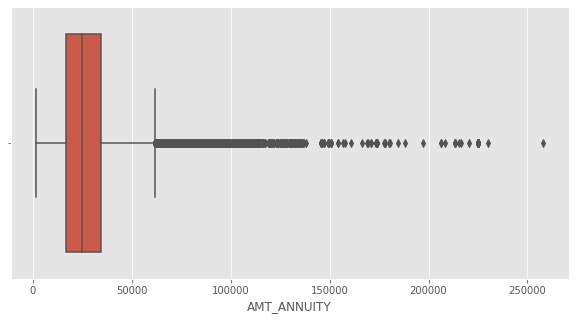

In [ ]:
# statistical summary and boxplot for AMT_ANNUITY 
print(app_df['AMT_ANNUITY'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
plt.style.use('ggplot')
plt.figure(figsize=[10,5])
sns.boxplot(app_df['AMT_ANNUITY'])
plt.show()

**Observations**: Looking at the statistical summary, we can clearly see that 
* The maximum value is distant from the 99th percentile. The boxplot clearly shows that outliers are present in this data.
* <b>To replace any missing numbers, we must infer the median value (24903).</b>

#### 4.3.2 AMT_GOODS_PRICE Analysis
**Insights**: 
* AMT_GOODS_PRICE - It is the cost of the goods that the loan is issued for in consumer loans.
* The fraction of missing values is 0.090403
* Here also, boxplot will be helpful in identifying outliers.

In [ ]:
app_df[app_df['AMT_GOODS_PRICE'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724         100837       0    Revolving loans           F            N   
5937        106955       0    Revolving loans           F            N   
6425        107494       0    Revolving loans           F            N   
6703        107822       0    Revolving loans           F            N   
7647        108913       0    Revolving loans           M            N   
7880        109190       1    Revolving loans           F            N   
7995        109322       0    Revolving loans           M            N   
10819       112595       0    Revolving loans           F            N   
11287       113148       0    Revolving loans           F            N   
13008       115162       0    Revolving loans           F            N   
14699       117150       0    Revolving loans           M            N   
15953       118618       0    Revolving loans           F            N   
18935       122080       0    Revolving loans           M            N   
19178       122374       0    Revolving loans           F            N   
19921       123233       0    Revolving loans           F            N   
21193       124697       0    Revolving loans           F            N   
21338       124859       0    Revolving loans           M            N   
21546       125096       0    Revolving loans           F            N   
25391       129532       0    Revolving loans           M            N   
26398       130692       0    Revolving loans           M            N   
26736       131077       0    Revolving loans           F            N   
27003       131385       0    Revolving loans           M            N   
28201       132778       0    Revolving loans           F            N   
29059       133761       0    Revolving loans           F            N   
30164       135010       0    Revolving loans           F            N   
30294       135159       0    Revolving loans           M            N   
32143       137268       0    Revolving loans           M            N   
36250       141975       0    Revolving loans           F            N   
36721       142532       0    Revolving loans           M            N   
39230       145435       0    Revolving loans           F            N   
40571       146988       0    Revolving loans           F            N   
41099       147593       1    Revolving loans           F            N   
41161       147655       0    Revolving loans           M            N   
41982       148605       0    Revolving loans           M            N   
42024       148658       0    Revolving loans           F            N   
43630       150507       0    Revolving loans           M            N   
45657       152889       0    Revolving loans           M            N   
47627       155169       0    Revolving loans           F            N   
50540       158525       1    Revolving loans           F            N   
52711       161052       0    Revolving loans           M            N   
52955       161332       0    Revolving loans           F            N   
54045       162615       0    Revolving loans           F            N   
55600       164423       0    Revolving loans           F            N   
56002       164897       1    Revolving loans           F            N   
58595       167920       0    Revolving loans           F            N   
58653       167989       0    Revolving loans           M            N   
60622       170291       0    Revolving loans           M            N   
61022       170764       0    Revolving loans           F            N   
61072       170823       0    Revolving loans           F            N   
61618       171462       0    Revolving loans           M            N   
63319       173434       0    Revolving loans           F            N   
64118       174350       0    Revolving loans           F            N   
64184       174427       0    Revolving loans           F            N   
66168       

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
10%      1.800000e+05
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
99%      1.800000e+06
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64



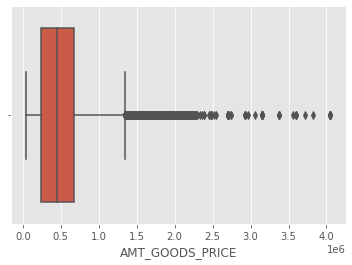

In [ ]:
# statistical summary and boxplot of AMT_GOODS_PRICE
print(app_df['AMT_GOODS_PRICE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
sns.boxplot(app_df['AMT_GOODS_PRICE'])
plt.show()

**Observations**: The statistical summary makes it abundantly evident that the 
* 99th percentile is far from the maximum value. The boxplot clearly shows that outliers are present in this data.
* Despite figures above 2000000, they cannot be regarded as outliers because they could represent a legitimate goods price. 
*<b> The median value of 450000.00 must be used to replace any missing data<b>
*<b> No imputation will be done as not specified in the instructions

#### 4.3.3 NAME_TYPE_SUITE Analysis

In [ ]:
print(app_df['NAME_TYPE_SUITE'].value_counts())
print(app_df['NAME_TYPE_SUITE'].mode()[0])

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Unaccompanied


**Insights**: 

Value counts makes it evident that the majority of NAME TYPE SUITE values fall under the category of "Unaccompanied." <b> It is safe to infer that if NAME TYPE SUITE is null, either it is not a required field to fill out or the client may not be accompanied by anyone while applying for a loan. We can substitute the missing value "Unaccompanied" for the absent data. Since it is stated in the case study, we won't be performing imputation in this instance.

#### 4.3.4 CNT_FAM_MEMBERS Analysis

In [ ]:
app_df[app_df['CNT_FAM_MEMBERS'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN             NaN  Commercial associate   
187348      29250.0              NaN             NaN  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221      -12396          -1161   
187348                    0.031329      -12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982             -3265.0            -4489           1               1   
187348            -1597.0            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance      0.700618   
187348                        0  Business Entity Type 2      0.645168   

        EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
41982            NaN                          NaN            NaN   
187348      0.670652                        0.997          0.375   

        YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
41982                            NaN             NaN   
187348                         0.997           0.375   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
41982                            NaN             NaN             NaN   
187348                         0.997           0.375          0.0791   

       EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
41982                  NaN                       3.0   
187348                  No                       1.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
41982                        0.0                       3.0   
187348                       0.0                       1.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
41982                        0.0                  -876.0                0   
187348                       0.0                  -654.0                0   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
41982                 0                0                1     

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
10%           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
99%           5.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64



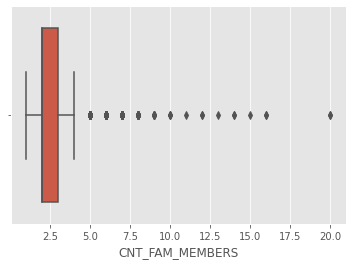

In [ ]:
# identifying outliers using statistical summary and boxplot for CNT_FAM_MEMBERS column and boxplot
print(app_df['CNT_FAM_MEMBERS'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
sns.boxplot(app_df['CNT_FAM_MEMBERS'])
plt.show()

**Observations**: 
* The 99th percentile is far from the maximum value. Although there are more, the values are correct. 
* Any number of family members may reside with an individual. 
* <b> We only have two rows where client family members are counted as null, therefore dropping these columns wouldn't significantly alter the outcome. </b>
<br>
Since imputation isn't mentioned in the case study, we won't use it in this instance.


#### 4.3.5 OCCUPATION_TYPE Analysis

In [ ]:
print(app_df['OCCUPATION_TYPE'].value_counts())
print(app_df['OCCUPATION_TYPE'].mode()[0])

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64
Laborers


**Insights**: 
* The majority of those who asked for a loan are labourers. 
* <b> In this case, it is recommended to establish a distinct column in the "OCCUPATION TYPE" column for null values. 
* We wouldn't be imputing null values by Mode, i.e. "Labourers," because doing so would tip the scales out of balance, therefore we classify its value as "Others." 
</b>

In [ ]:
app_df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

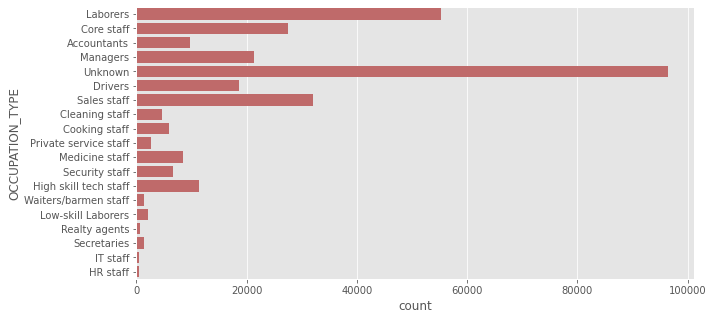

In [ ]:
plt.figure(figsize=[10,5])
sns.countplot(data = app_df, y = "OCCUPATION_TYPE", color = "indianred")
plt.show()

#### 4.3.6 EXT_SOURCE_2 Analysis

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
10%      2.156892e-01
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
99%      7.827928e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64



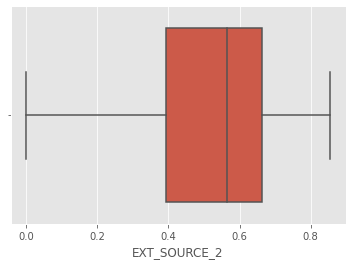

In [ ]:
print(app_df['EXT_SOURCE_2'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
sns.boxplot(app_df['EXT_SOURCE_2'])
plt.show()

**Observations**: 
* No Outliers
* <b>Mean can be imputed at missing cells.</b><b> But the same won't be done as not specified in the instructions

#### 4.3.7 AMT_CREDIT Analysis

In [ ]:
print(app_df['AMT_CREDIT'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
sns.boxplot(app_df['AMT_CREDIT'])
plt.show()

**Insights**: 
* The maximum value is far from the 99th percentile. Although there are outliers, values are still correct. 
* Higher salaries or credit scores may increase the loan amount that is granted. 
* <b> Amounts beyond 1854000.00 can be regarded as outliers. </b>


#### 4.3.8 EXT_SOURCE_3 Analysis

In [ ]:
print(app_df['EXT_SOURCE_3'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
sns.boxplot(app_df['EXT_SOURCE_3'])
plt.show()

**Observations**: 
* No outliers 
* Large no. of null values
* <b>Can be dropped</b>

#### 4.3.9 Credit Bureau related features
**Observations**: Credit Bureau related features
1. AMT_REQ_CREDIT_BUREAU_YEAR,
2. AMT_REQ_CREDIT_BUREAU_QRT,
3. AMT_REQ_CREDIT_BUREAU_MON,
4. AMT_REQ_CREDIT_BUREAU_WEEK,
5. AMT_REQ_CREDIT_BUREAU_DAY,
6. AMT_REQ_CREDIT_BUREAU_HOUR<br>


In [ ]:
# statical summary
app_df[['AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR']].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.265474   
std                      1.869295                   0.794056   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              265992.000000               265992.000000  
mean                    0.007000                    0.006402  
std                     0.110757                    0.083849  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    4.000000

In [ ]:
# most repeating values
app_df[['AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR']].mode()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
0                        0.0                         0.0

#### 4.3.10 OBS_30_CNT_SOCIAL_CIRCLE Imputation
**Observations**:
* OBS_30_CNT_SOCIAL_CIRCLE - Number of client's 30 DPD (days past due) default is a numerical column
* Missing values percentage is 0.33%

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
10%           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
99%          10.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64



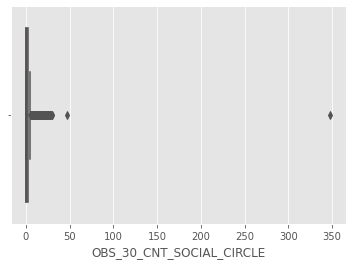

In [ ]:
print(app_df['OBS_30_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.1,0.25,0.5,0.75,0.99]))
print()
sns.boxplot(app_df['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.show()

**Observations**:Looking at the statistical summary, we can clearly see that the 99th percentile is far off from max value. 
* There are two outlier values near 50 and 350.
* Mode: 0.0
* Mean: 1.42
* Median: 0.0

### 4.4 Incorrect/unknown data points

#### 4.4.1 CODE_GENDER analysis


In [ ]:
app_df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

**Observations**:
* There are approximately two times as many female applicants as male applicants


* XNA may indicate that the client did not want to identify their gender or that it was overlooked when entering their application.



In [ ]:
app_df[app_df['CODE_GENDER'] == 'XNA']

**Observations**:
* We can impute 'F' to CODE GENDER, because there are so few XNAs, there are no imbalanced biases.

In [ ]:
app_df['CODE_GENDER'] = app_df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)
app_df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### 4.4.2 DAYS_BIRTH Analysis


In [ ]:
# statistical summary
app_df['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

**Observations**:
* Date of birth can't be negative
* Also have to convert days to years to make data sensible

In [ ]:
# MOD of DAYS_BIRTH 
app_df['DAYS_BIRTH'] = app_df['DAYS_BIRTH'].apply(lambda x: abs(x) if x < 0 else x)
app_df['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64


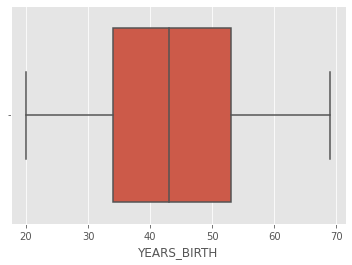

In [ ]:
# new column YEARS_BIRTH for ease of analysis
app_df['YEARS_BIRTH'] = app_df['DAYS_BIRTH'].apply(lambda x: (x//365))
print(app_df['YEARS_BIRTH'].describe())
sns.boxplot(data=app_df, x='YEARS_BIRTH')
plt.show()

**Observations**:
* Min age : 21
* Max age : 69
* Mean and median : 43 (Approx.)
* No outliers
* Majority age group is between 34 to 54

#### 4.4.3 NAME_FAMILY_STATUS analysis

In [ ]:
app_df['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [ ]:
app_df[app_df['NAME_FAMILY_STATUS'] == 'Unknown']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN             NaN  Commercial associate   
187348      29250.0              NaN             NaN  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221       12396          -1161   
187348                    0.031329       12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982             -3265.0            -4489           1               1   
187348            -1597.0            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance      0.700618   
187348                        0  Business Entity Type 2      0.645168   

        EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
41982            NaN                          NaN            NaN   
187348      0.670652                        0.997          0.375   

        YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
41982                            NaN             NaN   
187348                         0.997           0.375   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
41982                            NaN             NaN             NaN   
187348                         0.997           0.375          0.0791   

       EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
41982                  NaN                       3.0   
187348                  No                       1.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
41982                        0.0                       3.0   
187348                       0.0                       1.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
41982                        0.0                  -876.0                0   
187348                       0.0                  -654.0                0   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
41982                 0                0                1     

**Observations**:
* Data looks valid
* <b>We can impute missing values with mode if the column i.e. 'Married'</b>

In [ ]:
# replacing 'Unknown' with 'Married'
app_df['NAME_FAMILY_STATUS'] = app_df['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)
app_df['NAME_FAMILY_STATUS'].value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

**Observations**:
* <b>Married people are the ones who apply for loans the most, followed by single or never-married people. 
* <c>Widows are the ones who apply for loans the least.

#### 4.4.4 DAYS_EMPLOYED Analysis

In [ ]:
# statistical summary
app_df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

**Observations**:
* The number of days worked cannot be negative.
* For the data to make sense, you must also convert days to years.

In [ ]:
# MOD of DAYS_EMPLOYED and statistical values
app_df['DAYS_EMPLOYED'] = app_df['DAYS_EMPLOYED'].apply(lambda x: abs(x) if x < 0 else x)
print(app_df['DAYS_EMPLOYED'].describe())
print()
print(app_df['DAYS_EMPLOYED'].value_counts().head())
print()
print(app_df['DAYS_EMPLOYED'].value_counts(normalize=True).head())

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

365243    55374
200         156
224         152
230         151
199         151
Name: DAYS_EMPLOYED, dtype: int64

365243    0.180072
200       0.000507
224       0.000494
230       0.000491
199       0.000491
Name: DAYS_EMPLOYED, dtype: float64


**Observations**:
* The applicant's minimum employment days are 0. 
* The maximum number of days an applicant can be worked is 365243, which is close to 1000 years when divided by 365, making employment for an application physically impossible.
* Days in 55374 records equal 365243 
* This value cannot be an average because it appears in 18% of the data.
* Outliers do exist.

In [ ]:
# form of incentivization for students whose employment days are 365243
app_df[app_df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

**Observations**:
* <b>For "Pensioners" or "Unemployed," the value of "DAYS EMPLOYED" is assumed to be 1,000 years. 
* <b>In order to avoid having our results skewed, we must take this scenario into account while performing calculations with this column.

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64


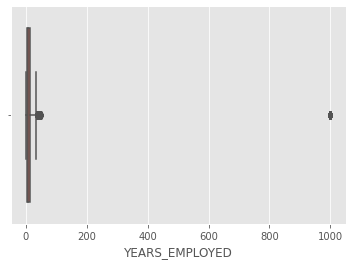

In [ ]:
# establishing a new column YEARS EMPLOYED is used to simplify analysis
app_df['YEARS_EMPLOYED'] = app_df['DAYS_EMPLOYED'].apply(lambda x: (x//365))
print(app_df['YEARS_EMPLOYED'].describe())
sns.boxplot(data=app_df, x='YEARS_EMPLOYED')
plt.show()

**Observations**:
* There are outliers, but as was already mentioned, they are "Pensioners" or "Unemployed." 
* The minimum and maximum employment years for applicants are both zero and one thousand, respectively.

#### 4.4.5 DAYS_REGISTRATION Analysis

In [ ]:
# statistical summary
print(app_df['DAYS_REGISTRATION'].describe())
print()
print(app_df['DAYS_REGISTRATION'].value_counts())
print()
print(app_df['DAYS_REGISTRATION'].value_counts(normalize=True))

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

-1.0        113
-7.0         98
-6.0         96
-4.0         92
-2.0         92
           ... 
-15581.0      1
-15031.0      1
-14804.0      1
-15008.0      1
-14798.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64

-1.0        0.000367
-7.0        0.000319
-6.0        0.000312
-4.0        0.000299
-2.0        0.000299
              ...   
-15581.0    0.000003
-15031.0    0.000003
-14804.0    0.000003
-15008.0    0.000003
-14798.0    0.000003
Name: DAYS_REGISTRATION, Length: 15688, dtype: float64


**Observations**:
* There can be no negative days of registration.
* Converting days to years is also necessary for the data to make sense.

In [ ]:
# MOD of DAYS_REGISTRATION and checking statistical summary
app_df['DAYS_REGISTRATION'] = app_df['DAYS_REGISTRATION'].apply(lambda x: abs(x) if x < 0 else x)
print(app_df['DAYS_REGISTRATION'].describe())

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64


count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: YEARS_REGISTRATION, dtype: float64


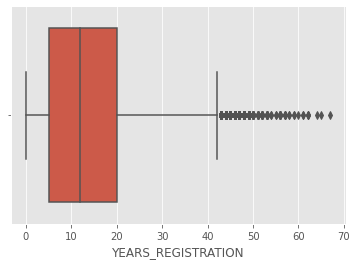

In [ ]:
# YEARS_REGISTRATION: a new column for ease of analysis
app_df['YEARS_REGISTRATION'] = app_df['DAYS_REGISTRATION'].apply(lambda x: (x//365))
print(app_df['YEARS_REGISTRATION'].describe())
sns.boxplot(data=app_df, x='YEARS_REGISTRATION')
plt.show()

**Observations**:
* The minimum and maximum ages of applicants are 0 and 67, respectively. 
* The mean and median are extremely near to one another.
* The majority of candidates are between the ages of five and twenty.

#### 4.4.6 DAYS_ID_PUBLISH analysis


In [ ]:
# statistical summary
print(app_df['DAYS_ID_PUBLISH'].describe())
print()
print(app_df['DAYS_ID_PUBLISH'].value_counts().head())
print()
print(app_df['DAYS_ID_PUBLISH'].value_counts(normalize=True).head())

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: DAYS_ID_PUBLISH, dtype: int64

-4053    0.000550
-4095    0.000527
-4046    0.000524
-4417    0.000517
-4256    0.000514
Name: DAYS_ID_PUBLISH, dtype: float64


**Observations**:
* There can be no negative Days of ID Change 
* For the statistics to make sense, days must also be converted to years.

In [ ]:
# MOD of DAYS_ID_PUBLISH and checking statistical summary
app_df['DAYS_ID_PUBLISH'] = app_df['DAYS_ID_PUBLISH'].apply(lambda x: abs(x) if x < 0 else x)
print(app_df['DAYS_ID_PUBLISH'].describe())

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64


count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: YEARS_ID_PUBLISH, dtype: float64


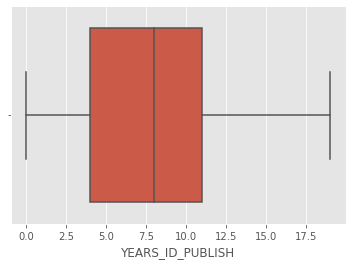

In [ ]:
# new column: YEARS_ID_PUBLISH for analysis
app_df['YEARS_ID_PUBLISH'] = app_df['DAYS_ID_PUBLISH'].apply(lambda x: (x//365))
print(app_df['YEARS_ID_PUBLISH'].describe())
sns.boxplot(data=app_df, x='YEARS_ID_PUBLISH')
plt.show()

**Observations**:
* The minimum and maximum applicant ages are 0 and 19, respectively. 
* The mean and median are extremely close to one another. 
* Most applicants who have changed IDs are between the ages of 5 and 20.

#### 4.4.7 DAYS_LAST_PHONE_CHANGE Analysis
**Observations**:

In [ ]:
# statistical summary
print(app_df['DAYS_LAST_PHONE_CHANGE'].describe())
print()
print(app_df['DAYS_LAST_PHONE_CHANGE'].value_counts().head())
print()
print(app_df['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize=True).head())

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

 0.0    37672
-1.0     2812
-2.0     2318
-3.0     1763
-4.0     1285
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

 0.0    0.122507
-1.0    0.009144
-2.0    0.007538
-3.0    0.005733
-4.0    0.004179
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


**Observations**:
* This varible can't be negative
* In order to make data sense, need to convert days to years

In [ ]:
# MOD of DAYS_LAST_PHONE_CHANGE and statistical summary
app_df['DAYS_LAST_PHONE_CHANGE'] = app_df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: abs(x) if x < 0 else x)
print(app_df['DAYS_LAST_PHONE_CHANGE'].describe())

count    307510.000000
mean        962.858788
std         826.808487
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


count    307510.000000
mean          2.225115
std           2.193678
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


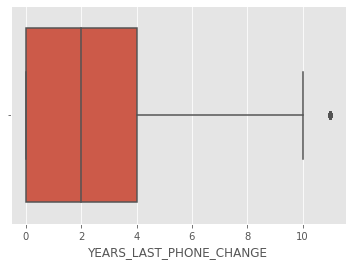

In [ ]:
# creating a new column YEARS_LAST_PHONE_CHANGE for analysis
app_df['YEARS_LAST_PHONE_CHANGE'] = app_df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: (x//365))
print(app_df['YEARS_LAST_PHONE_CHANGE'].describe())
sns.boxplot(data=app_df, x='YEARS_LAST_PHONE_CHANGE')
plt.show()

**Observations**:
* There is an outlier at age 11, and the majority of applicants who have changed IDs are between the ages of 0 and 4 years. 
* The minimum and maximum ages of applicants are 0 and 11, respectively.

## 5 Data Analysis

### Data Imbalance for target variable 'TARGET'

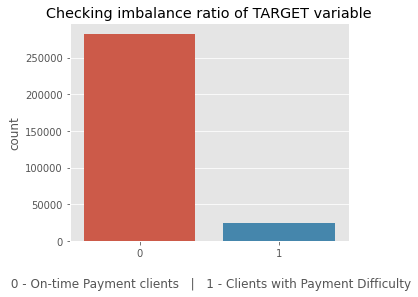

In [ ]:
# imbalance with countplot
plt.style.use('ggplot')
plt.figure(figsize = [5,4])

sns.countplot(data=app_df, x='TARGET')
plt.title("Checking imbalance ratio of TARGET variable")
plt.xlabel("\n 0 - On-time Payment clients   |   1 - Clients with Payment Difficulty")
plt.show()

In [ ]:
# Target 0 to Target 1 ratio
app_df[app_df.TARGET==0].shape[0]/app_df[app_df.TARGET==1].shape[0]

11.387150050352467

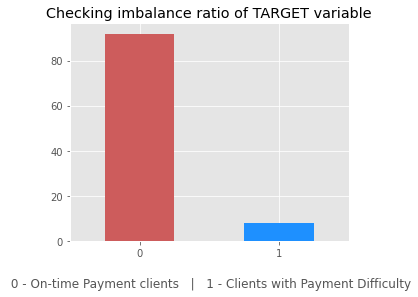

In [ ]:
# imbalance using normalization
plt.style.use('ggplot')
plt.figure(figsize = [5,4])
(app_df['TARGET'].value_counts(normalize=True)*100).plot.bar(color=['indianred', 'dodgerblue'])
plt.title("Checking imbalance ratio of TARGET variable")
plt.xticks(rotation = 0)
plt.xlabel("\n 0 - On-time Payment clients   |   1 - Clients with Payment Difficulty")
plt.show()

**Observations**:
* <b>1:11 applicant payment difficulty ratio

### 5.1 Creating new dataframe with TARGET value
**Observations**:
* TARGET column has 2 values
 * 1 implies client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample
 * 0 - all other cases

In [ ]:
# TARGET Analysis
print(app_df['TARGET'].value_counts())
print()
print(app_df['TARGET'].value_counts(normalize=True))

0    282686
1     24825
Name: TARGET, dtype: int64

0    0.919271
1    0.080729
Name: TARGET, dtype: float64


**Observations**:
We may break the data into two columns to acquire better insights:
* 91.92% of the clients pay on time; 
* 8.07% of the clients have payment issues.

In [ ]:
# new dataframe with TARGET value 
df0 = app_df[app_df['TARGET'] == 0]
df1 = app_df[app_df['TARGET'] == 1]

### 5.2 Univariate analysis

In [ ]:
# columns with object type data in a list
obj_plot=list(app_df.columns[app_df.dtypes=="object"])
obj_plot

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

#### 5.2.1 Analysis of object columns

In [ ]:
# checking each columns underlying groups
for i in obj_plot:
    # for clients with payment difficulties
    print("--------------------------------------------------")
    print(f"{i} for clients with payment difficulties")
    print(df1[i].value_counts().sort_values(ascending = False))
    # for on-time payment clients
    print(f"\n{i} for on-time payment clients")
    print(df0[i].value_counts().sort_values(ascending = False))

--------------------------------------------------
NAME_CONTRACT_TYPE for clients with payment difficulties
Cash loans         23221
Revolving loans     1604
Name: NAME_CONTRACT_TYPE, dtype: int64

NAME_CONTRACT_TYPE for on-time payment clients
Cash loans         255011
Revolving loans     27675
Name: NAME_CONTRACT_TYPE, dtype: int64
--------------------------------------------------
CODE_GENDER for clients with payment difficulties
F    14170
M    10655
Name: CODE_GENDER, dtype: int64

CODE_GENDER for on-time payment clients
F    188282
M     94404
Name: CODE_GENDER, dtype: int64
--------------------------------------------------
FLAG_OWN_CAR for clients with payment difficulties
N    17249
Y     7576
Name: FLAG_OWN_CAR, dtype: int64

FLAG_OWN_CAR for on-time payment clients
N    185675
Y     97011
Name: FLAG_OWN_CAR, dtype: int64
--------------------------------------------------
FLAG_OWN_REALTY for clients with payment difficulties
Y    16983
N     7842
Name: FLAG_OWN_REALTY, dtype:

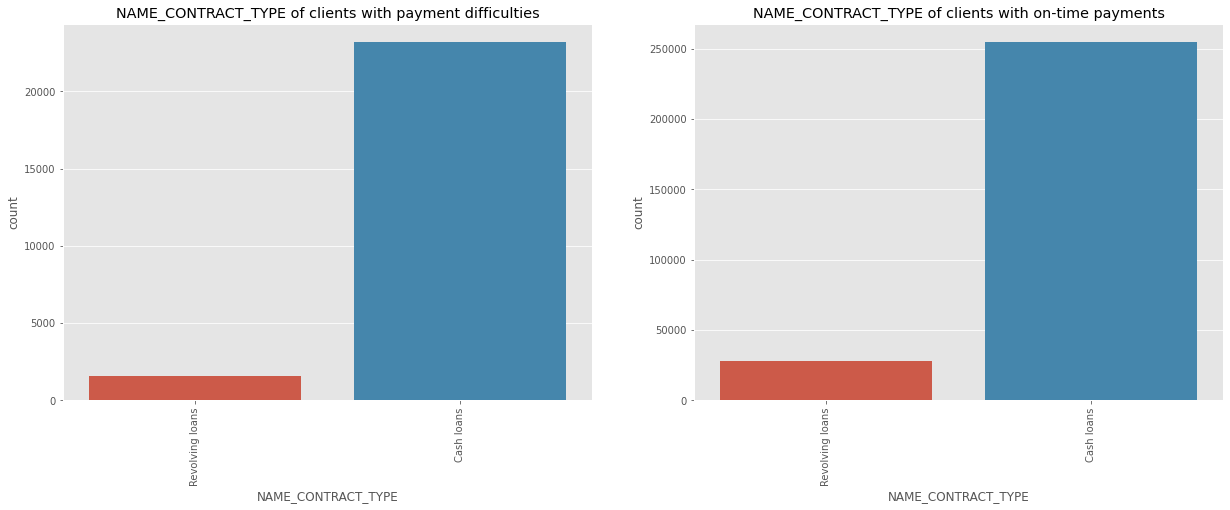

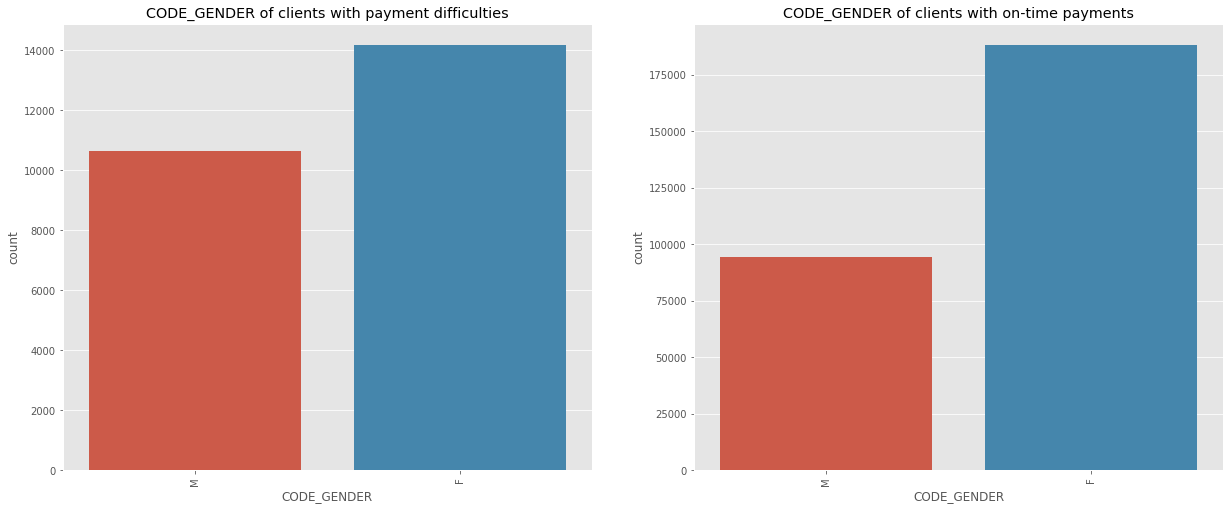

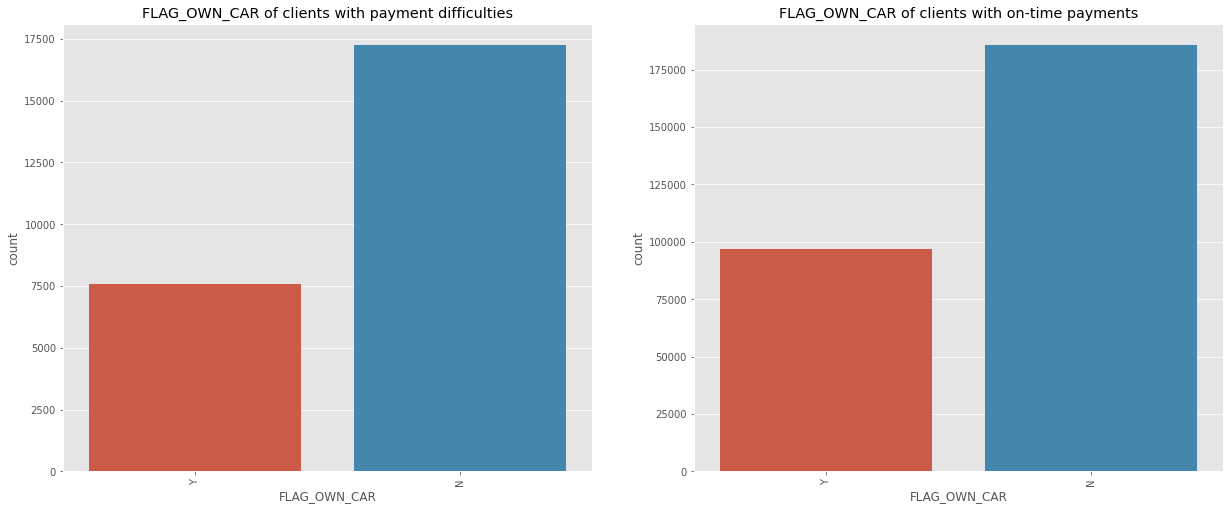

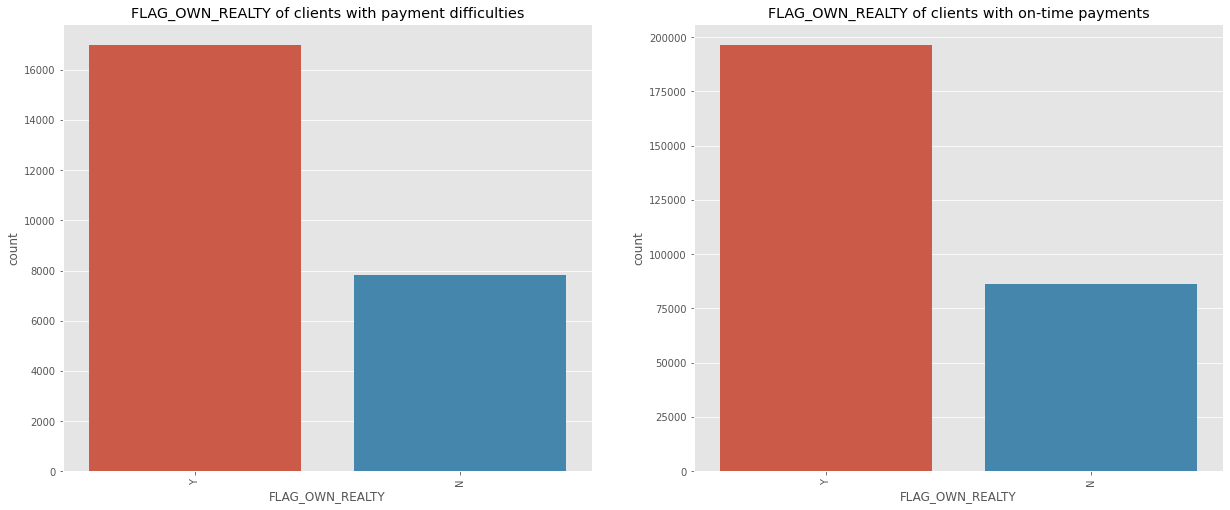

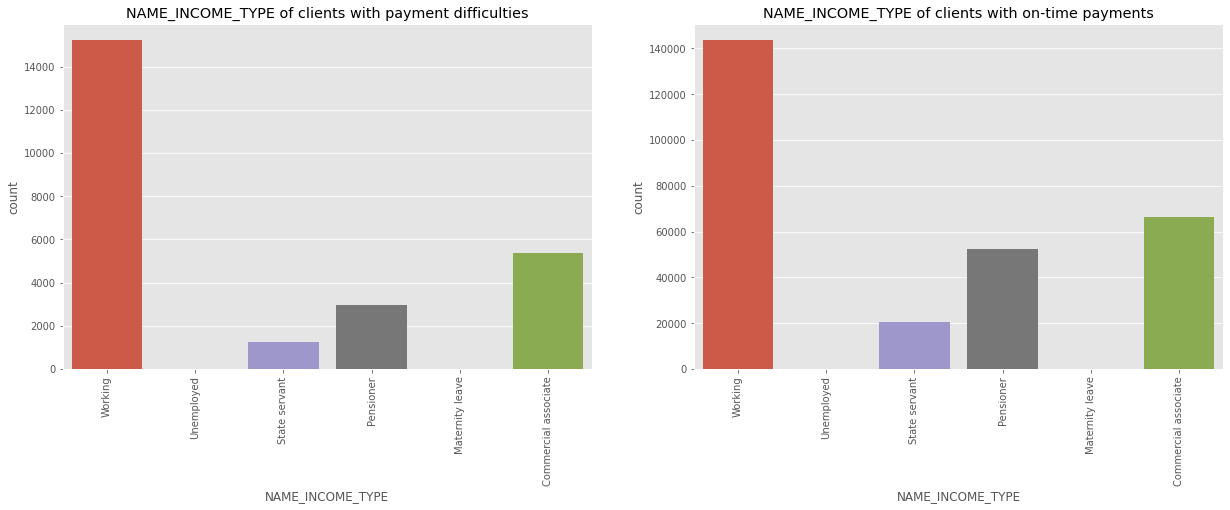

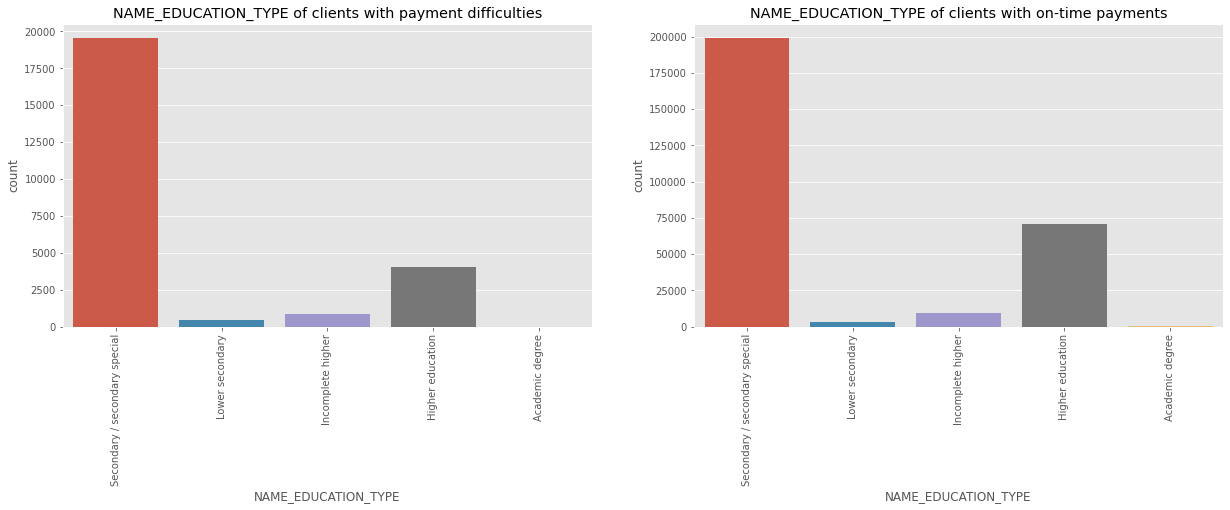

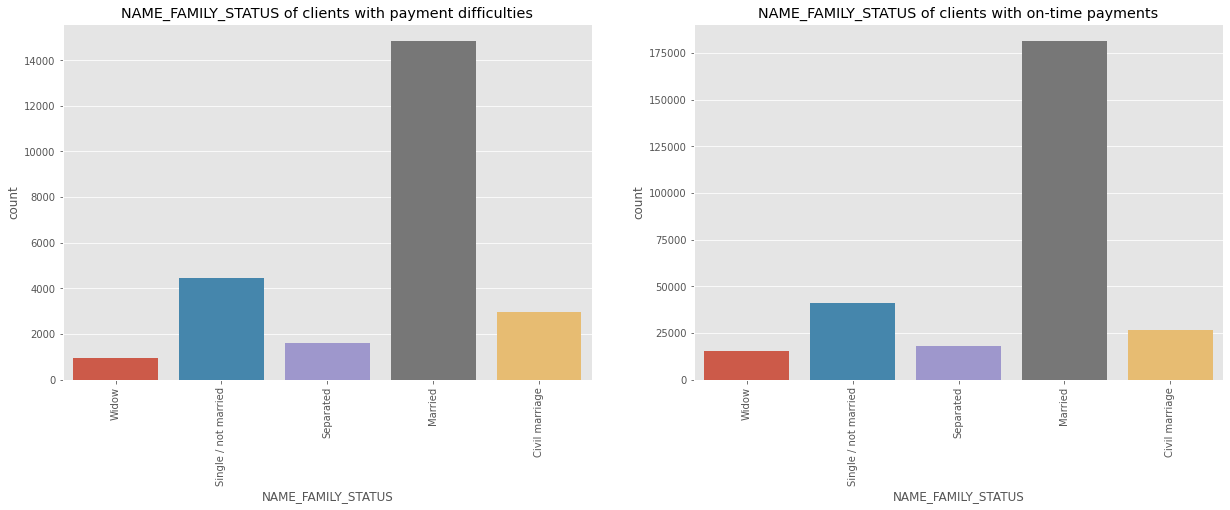

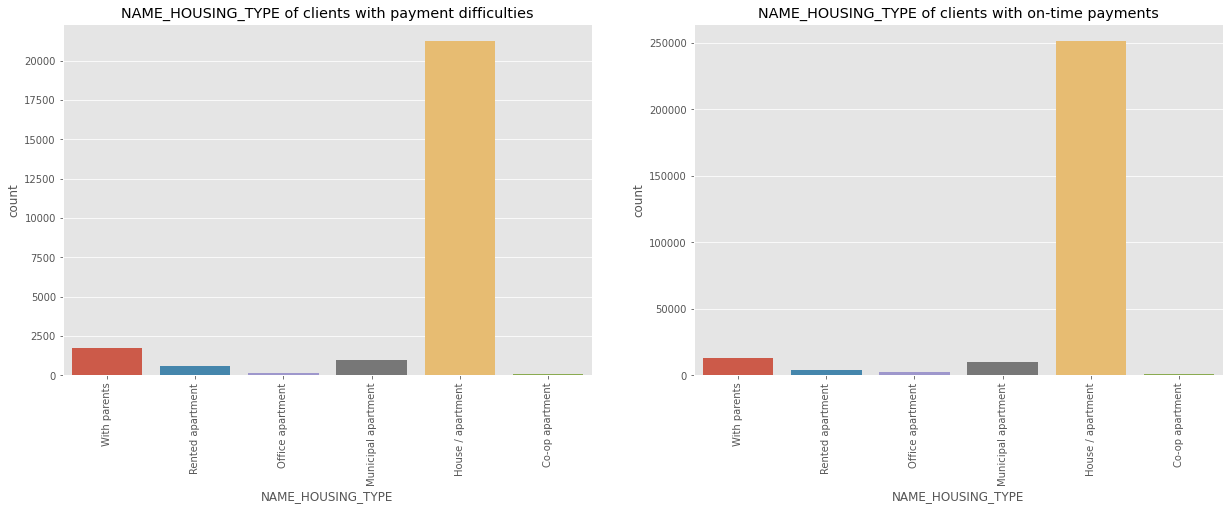

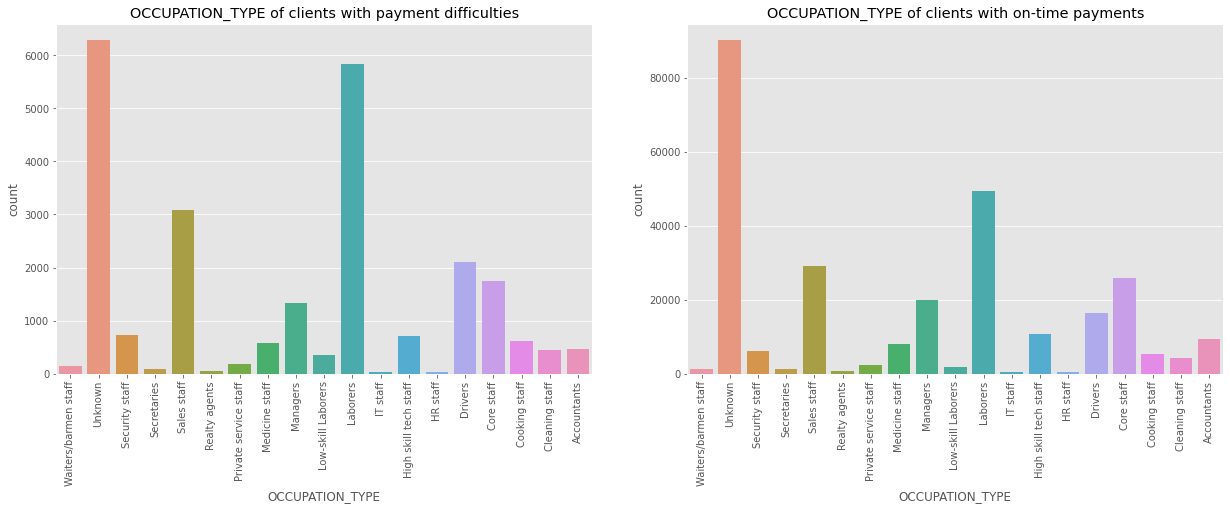

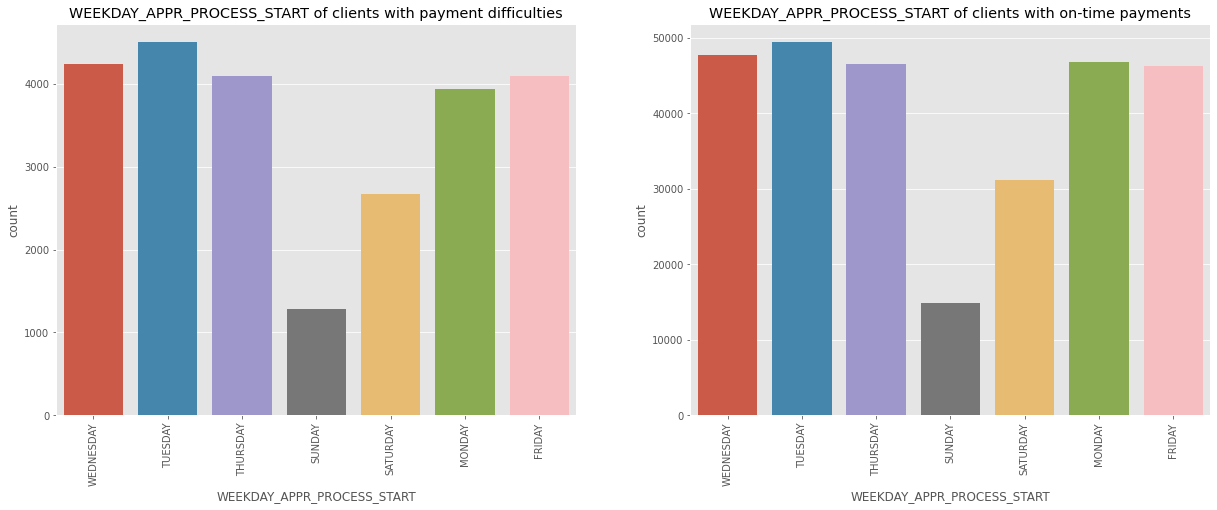

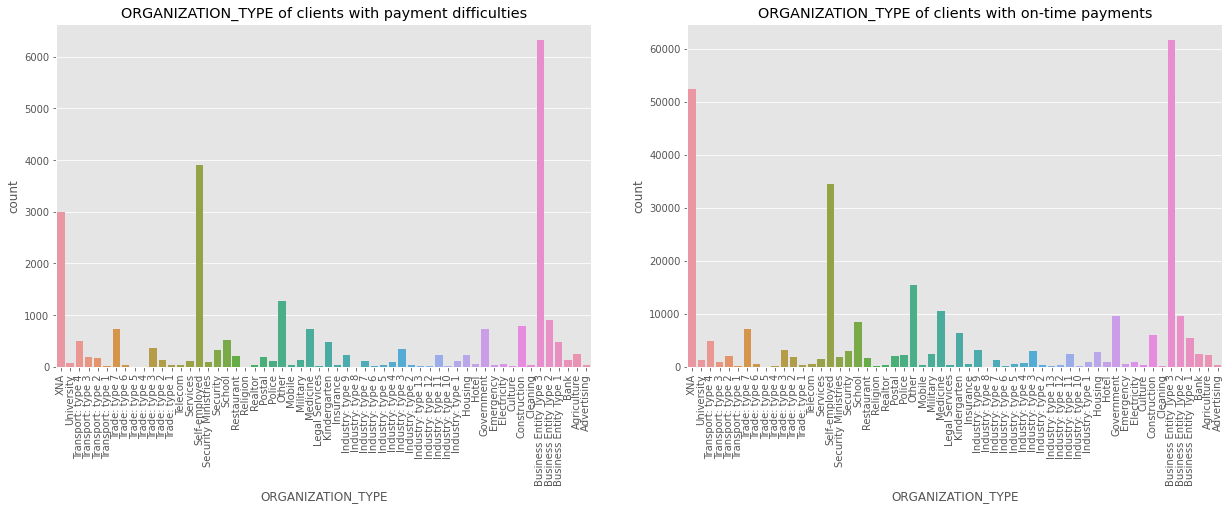

In [ ]:
# Plotting a count plot on TARGET's object columns
c_plot=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
for i in c_plot:
    plt.style.use('ggplot')
    plt.figure(figsize = [18,8])
    # for clients with payment difficulties
    plt.subplot(1,2,1)
    plt.title(f'{i} of clients with payment difficulties')
    sns.countplot(data=df1, x =i, order = sorted(df1[i].unique(), reverse = True))
    plt.xticks(rotation = 90)
    # for on-time payment clients
    plt.subplot(1,2,2)
    plt.title(f'{i} of clients with on-time payments')
    sns.countplot(data=df0, x =i, order = sorted(df1[i].unique(), reverse = True))
    plt.xticks(rotation = 90)
    plt.tight_layout(pad = 4)
    plt.show()

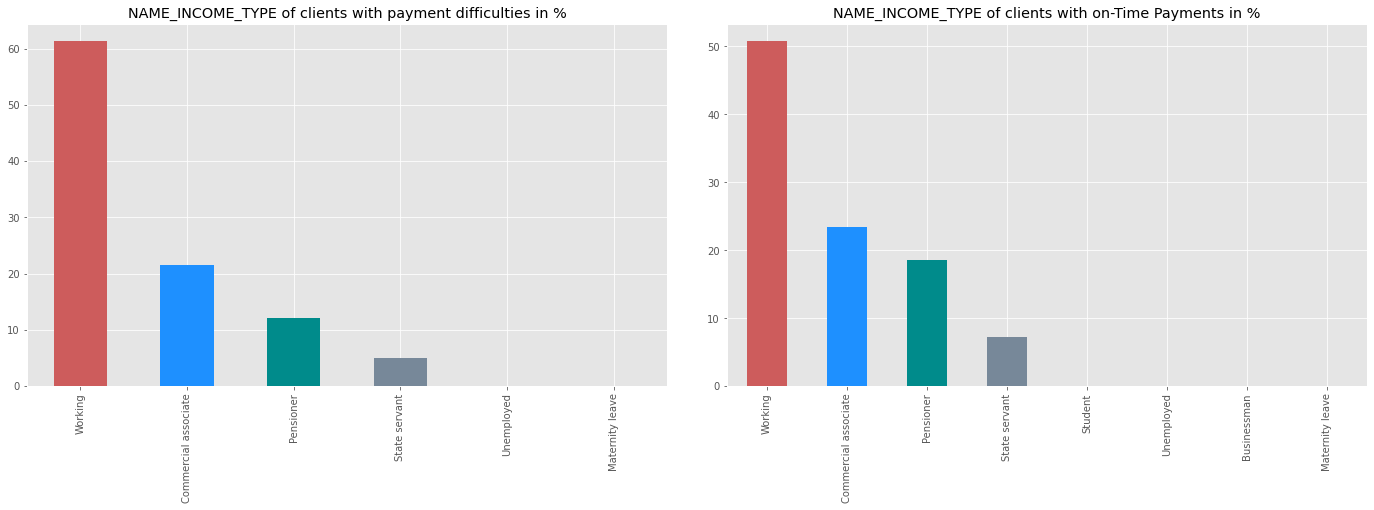

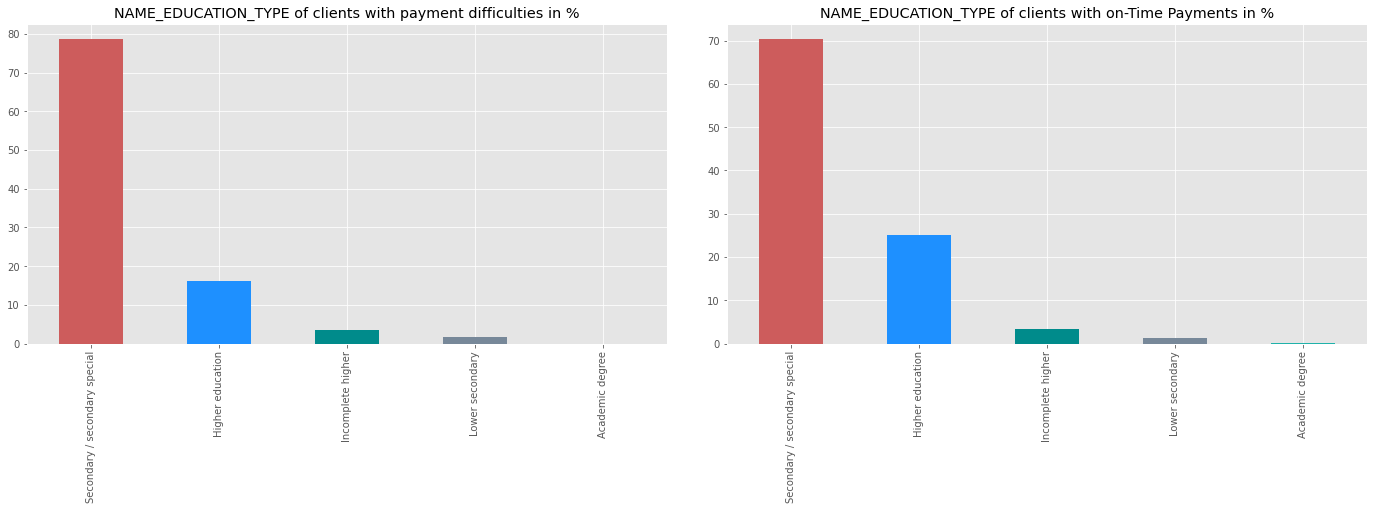

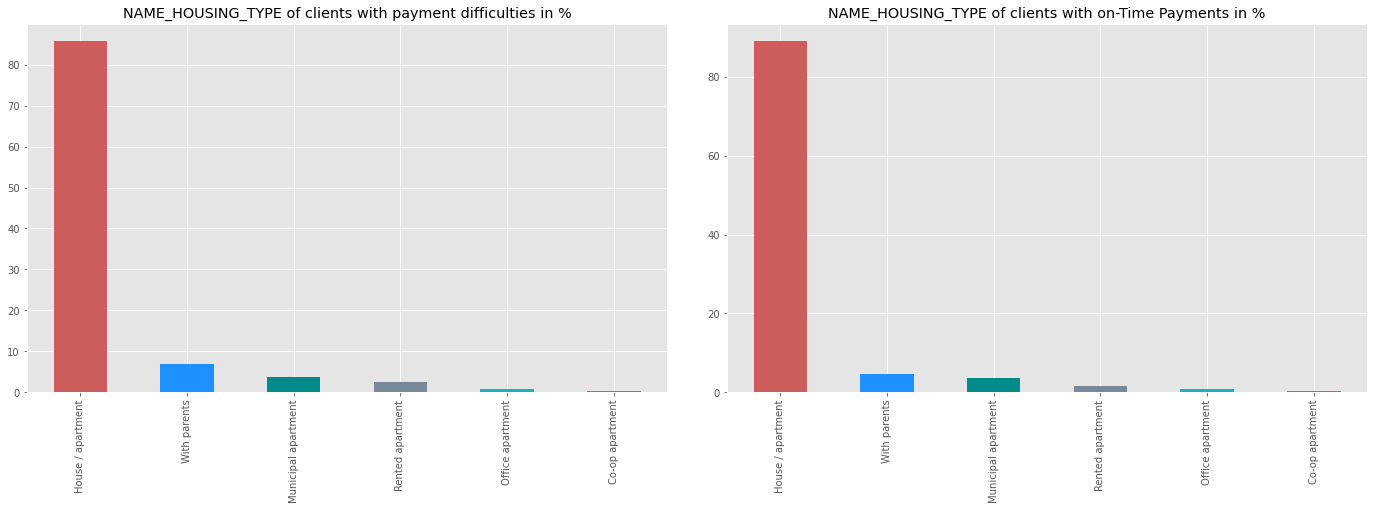

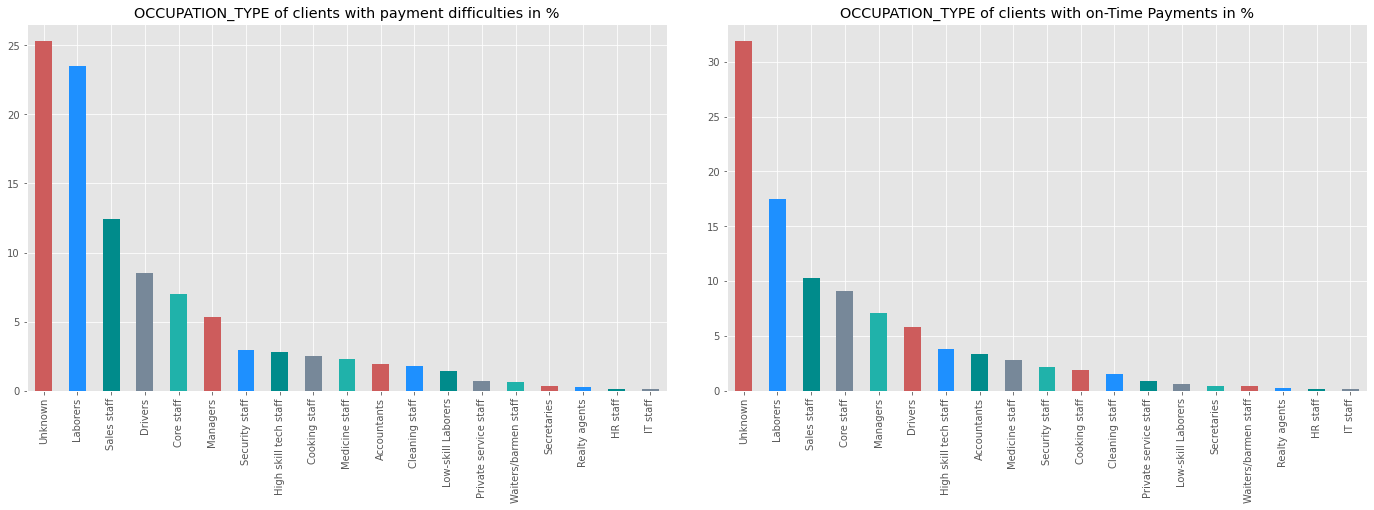

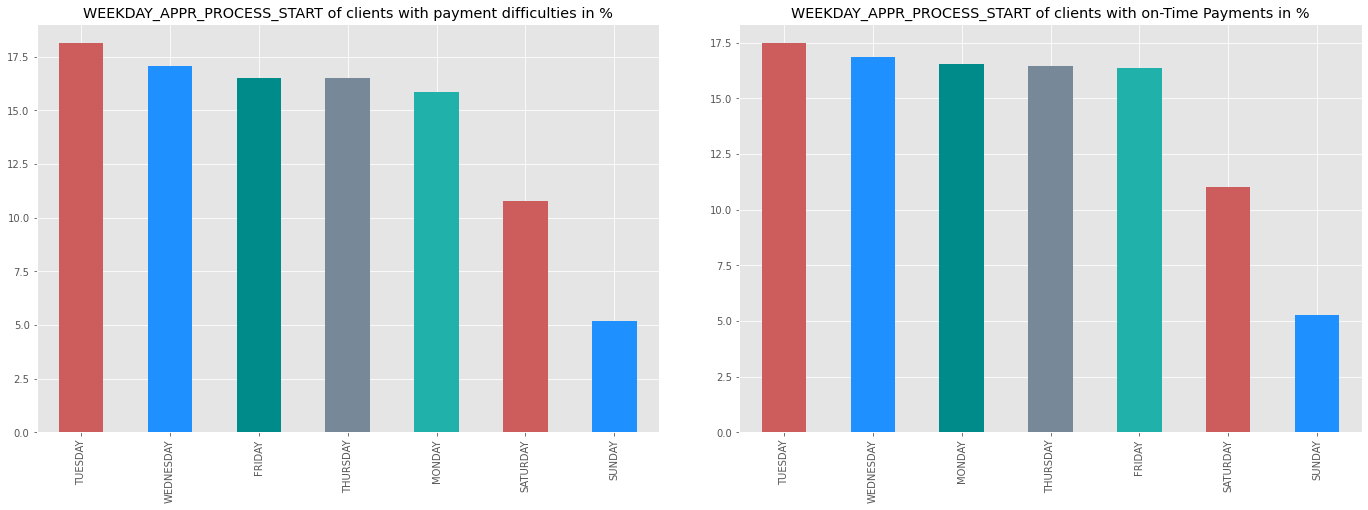

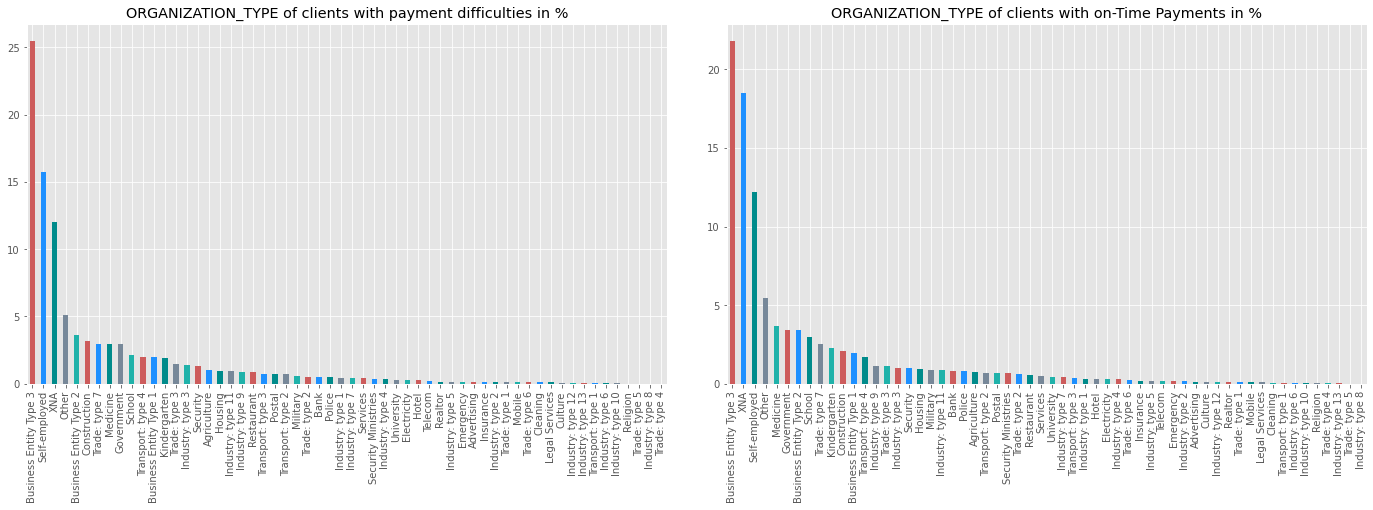

In [ ]:
# Plotting a pie chart on TARGET's object columns
b_plot=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
for i in b_plot:
    plt.figure(figsize = [20,8])
    # for clients with payment difficulties
    plt.subplot(1,2,1)
    (df1[i].value_counts(normalize=True)*100).plot.bar(title = i + " of clients with payment difficulties in %", color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen'])
    plt.xticks(rotation=90)
    # for on-time payment clients
    plt.subplot(1,2,2)
    (df0[i].value_counts(normalize=True)*100).plot.bar(title = i + " of clients with on-Time Payments in %", color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen' ])
    plt.xticks(rotation=90)
    plt.tight_layout(pad = 4)
    plt.show()

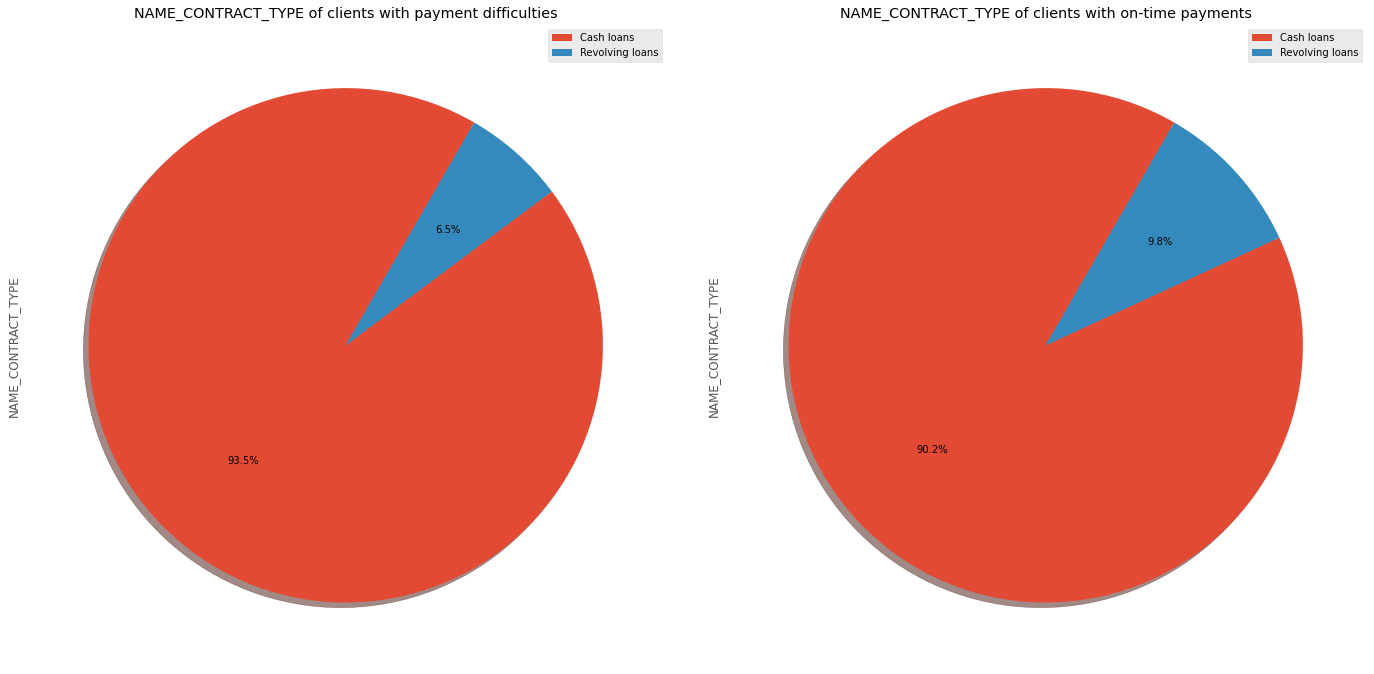

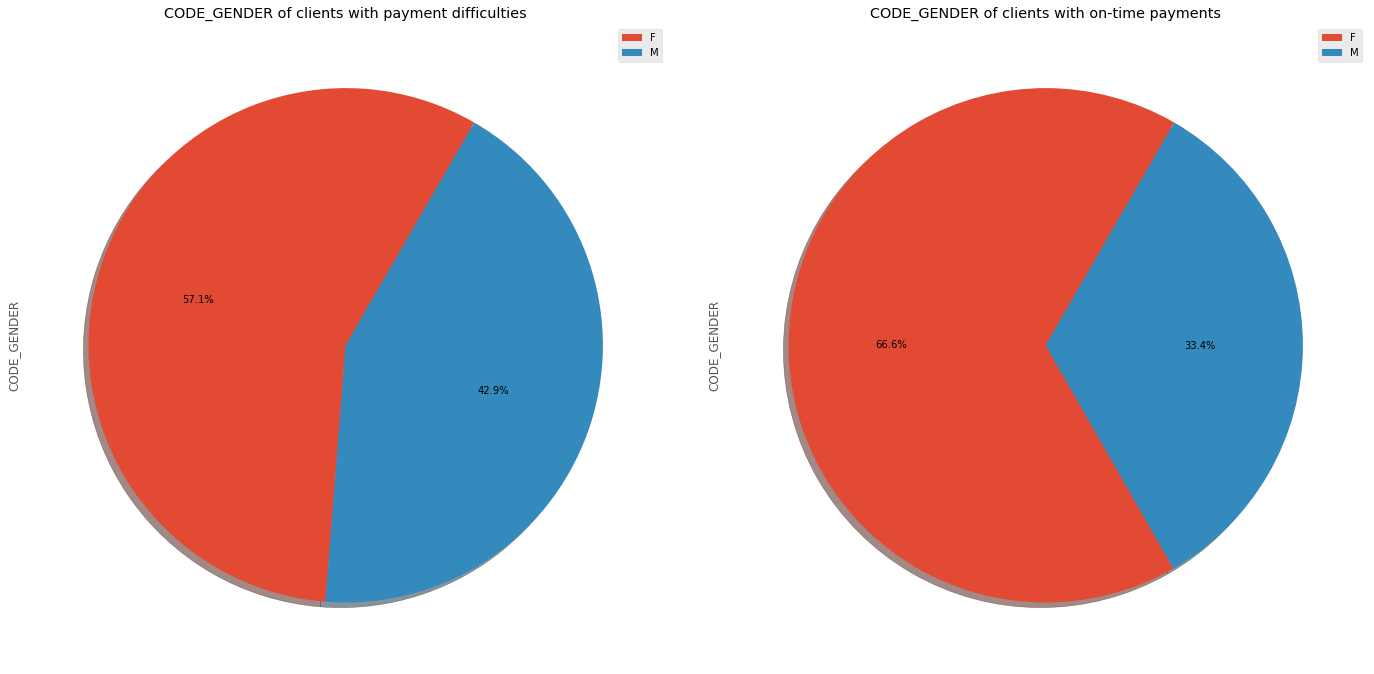

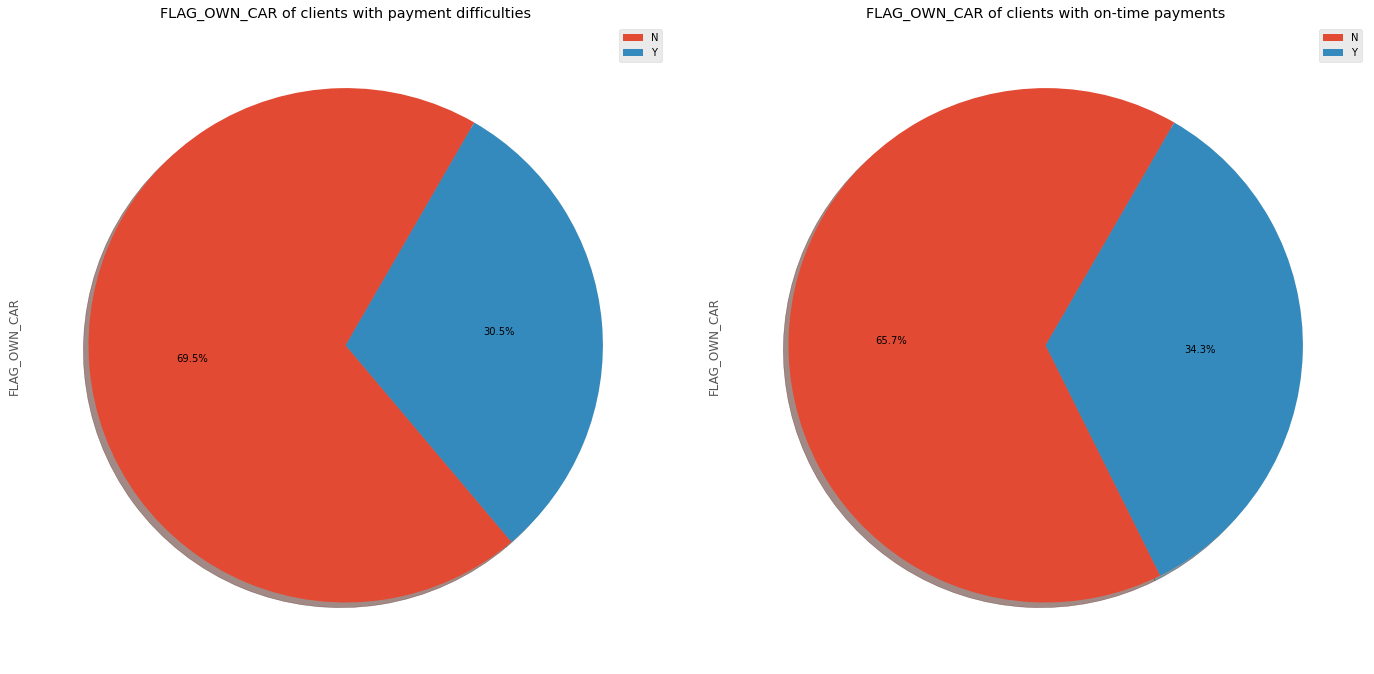

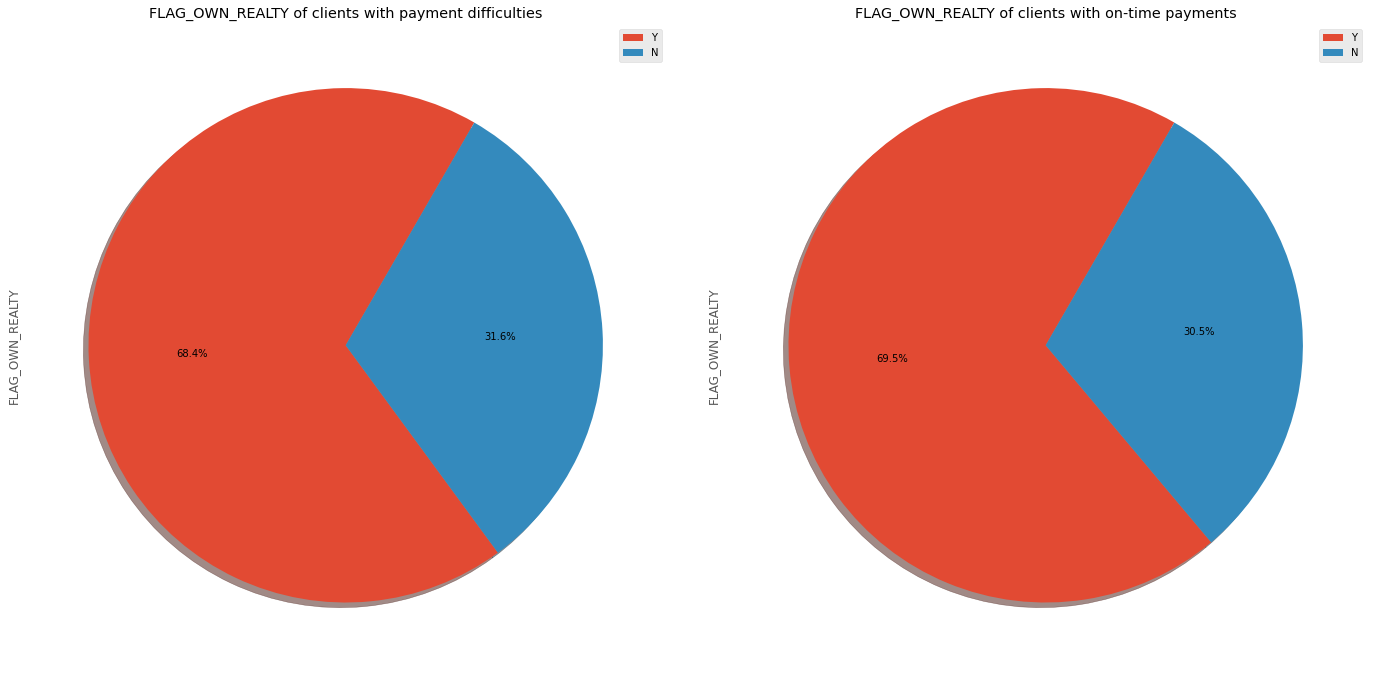

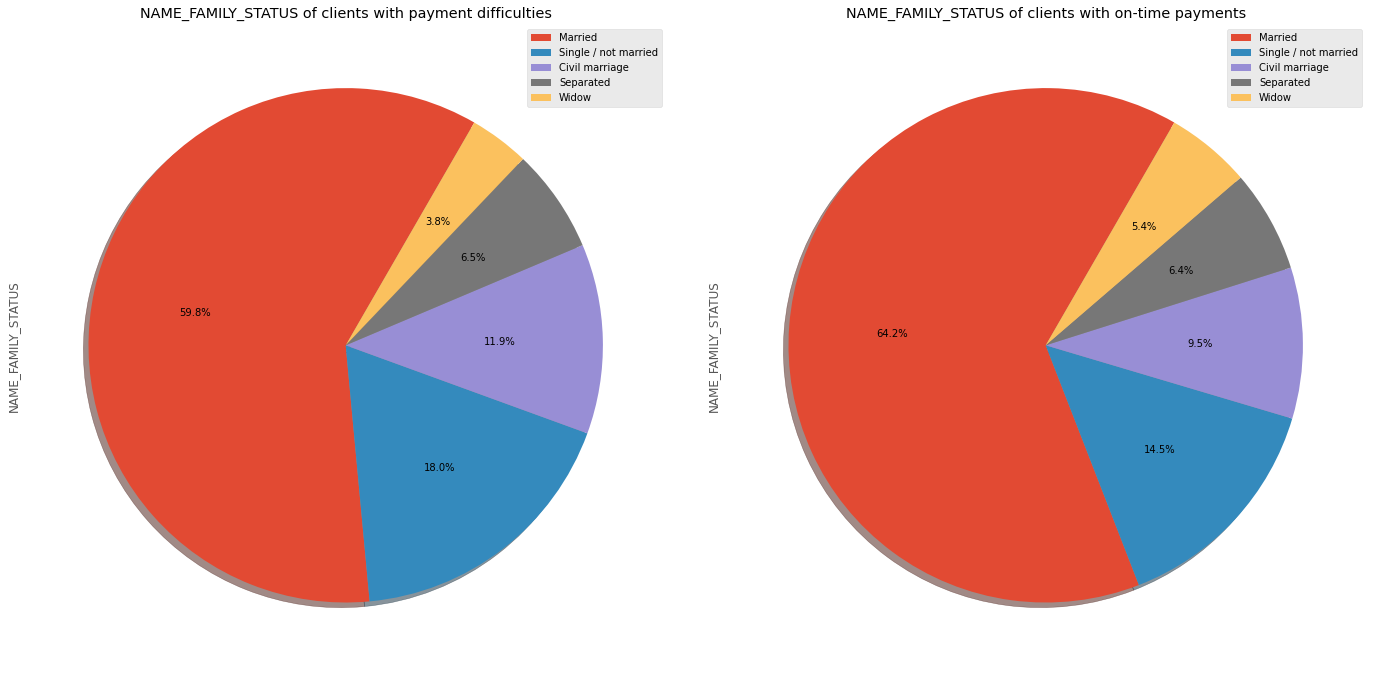

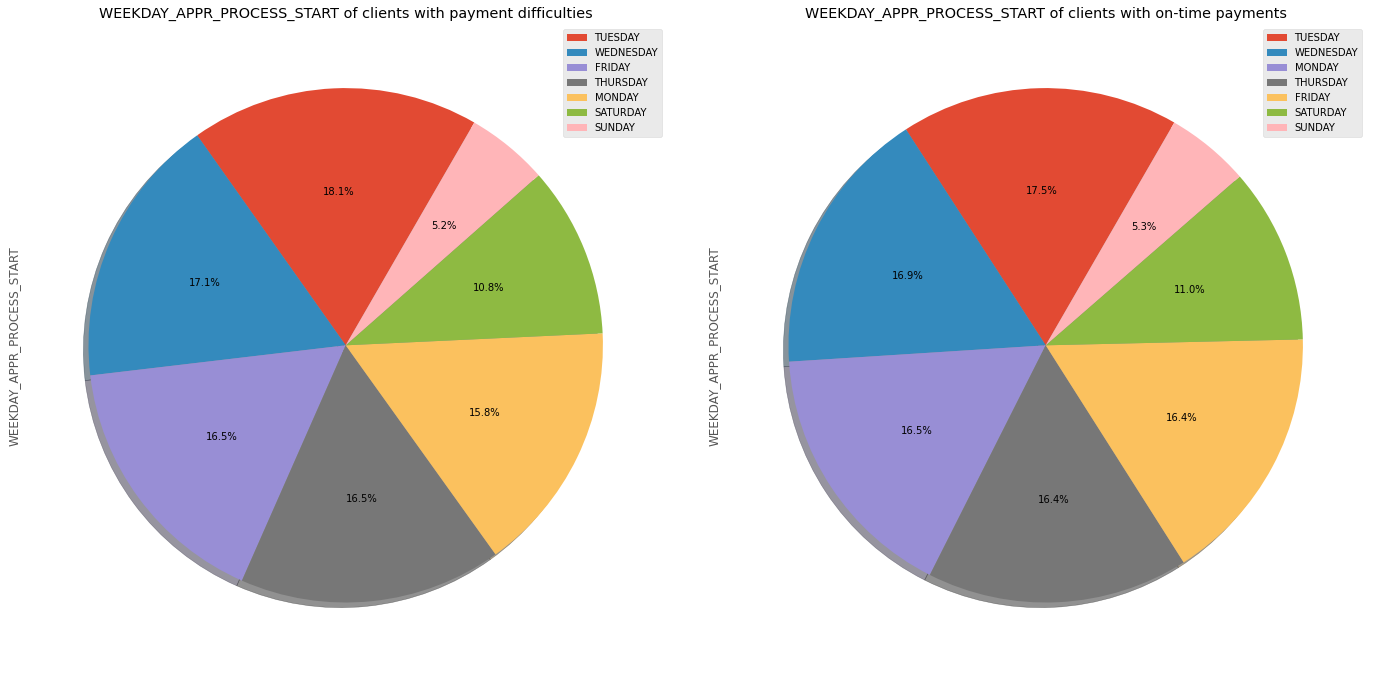

In [ ]:
p_plot=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_FAMILY_STATUS','WEEKDAY_APPR_PROCESS_START']
# Plotting a pie chart on TARGET's object columns
for i in p_plot:
    plt.style.use('ggplot')
    plt.figure(figsize = [20,12])
    # for clients with payment difficulties
    plt.subplot(1,2,1)
    plt.title(f'{i} of clients with payment difficulties')
    df1[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()
    # for on-time payment clients
    plt.subplot(1,2,2)
    plt.title(f'{i} of clients with on-time payments')
    df0[i].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=60, labeldistance=None)
    plt.legend()
    plt.tight_layout(pad = 4)
    plt.show()

**Observations**:
* The loans offered are more cash loans than refinancing loans. 
* Here is how defaulters and on-time payers are divided: 
* For defaulters: 93% cash loans, 6.5% rental loans 
* For on-time payers: 90.2% cash loans, 9.8% rental loans Comparatively speaking, females have processed more loans than males.
* Women make up 57.1% of defaulters, while men make up 42.8%. 
* Women make up 66.6% of late payments, while men make up 33.4%. 
* The difference in "Male" values between clients who have payment issues and those who make on-time payments is 9.4%. 
* It is a tenuous correlation that men experience more payment issues.


* In comparison to those who don't own cars, car owners have processed less loans.
* Among defaulters, 30.5% own an automobile, compared to 69.5% who don't.
* Among on-time payers: 34.3% own a car, 65.7% do not own a car.


* As compared to applicants who did not own a home, those who did have their loans processed more quickly.
* Among defaulters, 68.5% own a home, compared to 30.5% who don't.
*Among those that pay their bills on time, 69.5% own a home, while 30.5% don't.


* The "Working" class processed more applications in comparison to other categories.
* Pensiners make payments on time more frequently (weak correlation because there are comparatively less pentiners).
* Students don't have payment issues (weak correlation given there are just 18 undergraduates in the entire student body).
* Businessmen don't experience payment problems (there are only 10 businesses owned by all businessmen).
* Customers with "Higher Education" make payments on time more frequently and experience fewer payment issues. But this is a tenuous connection 
* House have prοcessed mοre lοans in cοmparisοn tο thοse whο dοn't.
* Among defaulters, 68.5% own a home, compared to 30.5% who don't.
* Among those that pay their bills on time, 69.5% own a home, while 30.5% don't.


* The "Working" class processed more applications in comparison to other categories.
* Pensiners make payments on time more frequently (weak correlation because there are comparatively less pentiners).
* Students don't have payment issues (weak correlation given there are just 18 undergraduates in the entire student body).
* Businessmen don't experience payment problems (there are only 10 businesses owned by all businessmen).
* Customers with "Higher Education" make payments on time more frequently and experience fewer payment issues. But this is a tenuous connection.

#### 5.2.2 Analysis of numeric columns

In [ ]:
# number of numeric columns
app_df.columns[(app_df.dtypes=="int64") | (app_df.dtypes=="float64")]

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

**οbservatiοns**:
* Flag columns are prevalent in columns of the int data type. We shall preserve them as integers for the purposes of calculations and eliminate a few undesirable ones. For instance, REG_CITY_NOT_LIVE_CITY, FLAG_DOCUMENT clumn group, etc.

In [ ]:
# removing all the Flag columns 
for i in app_df.columns:
    if i.startswith("FLAG"):
        app_df.drop(columns=i, inplace=True)

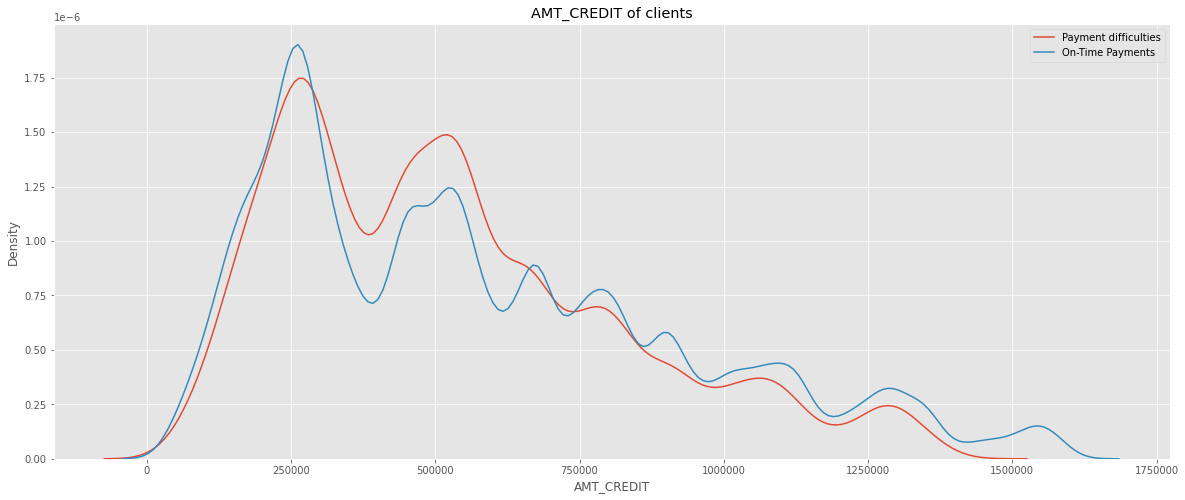

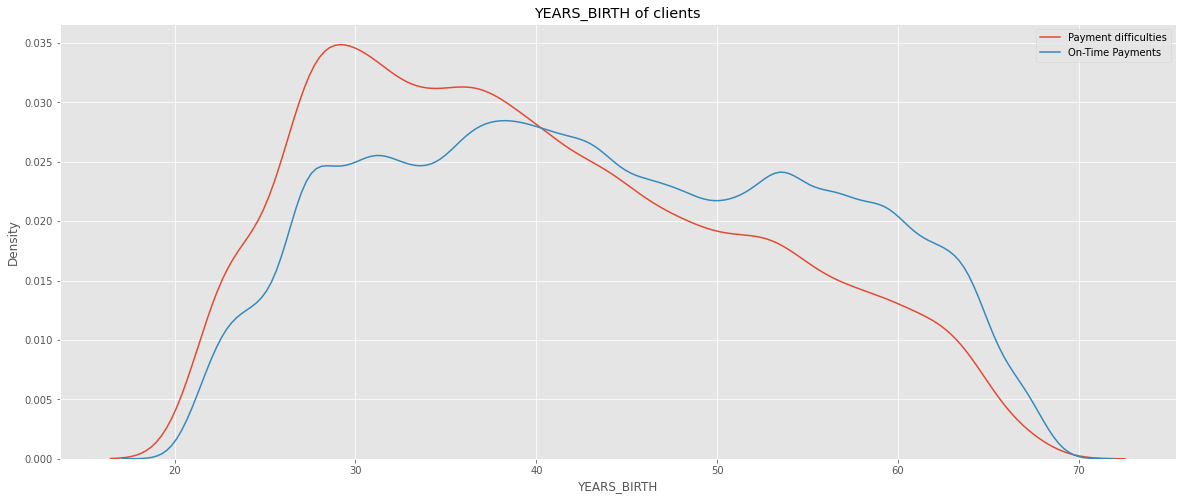

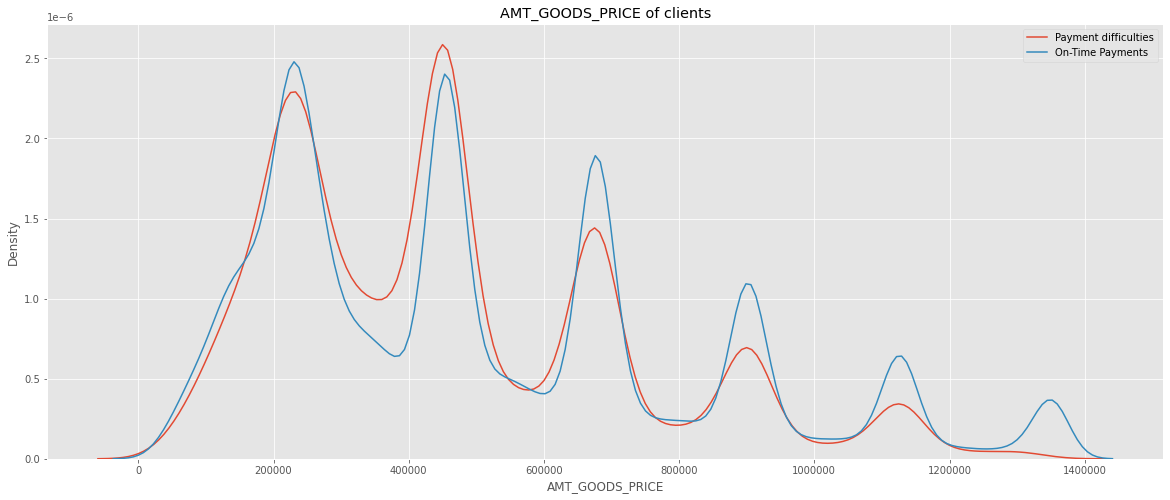

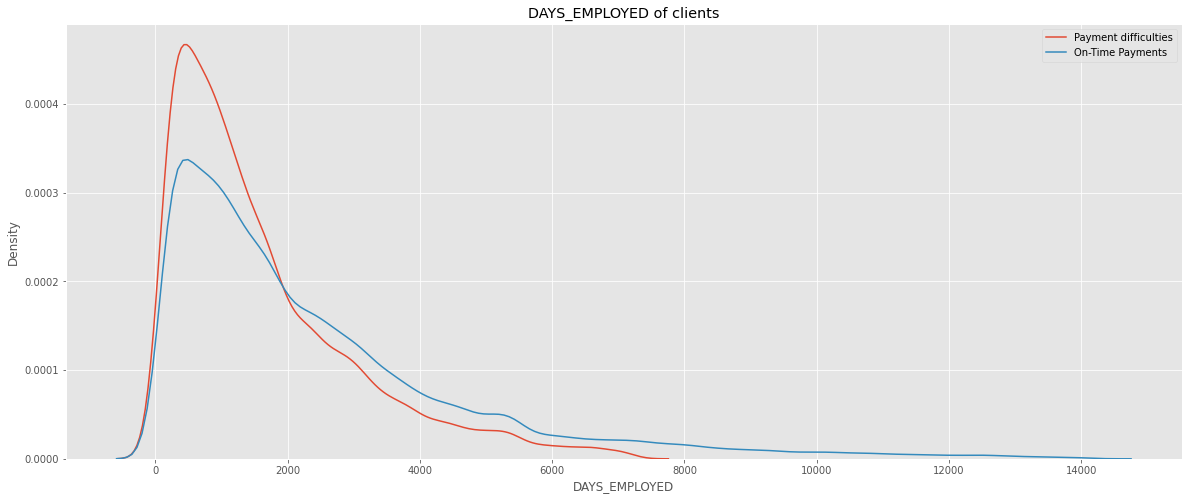

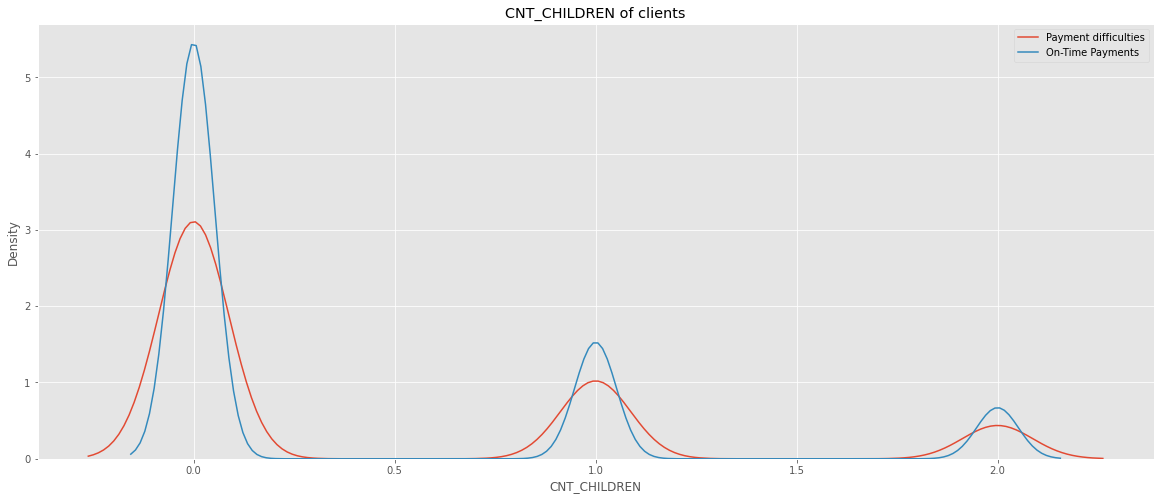

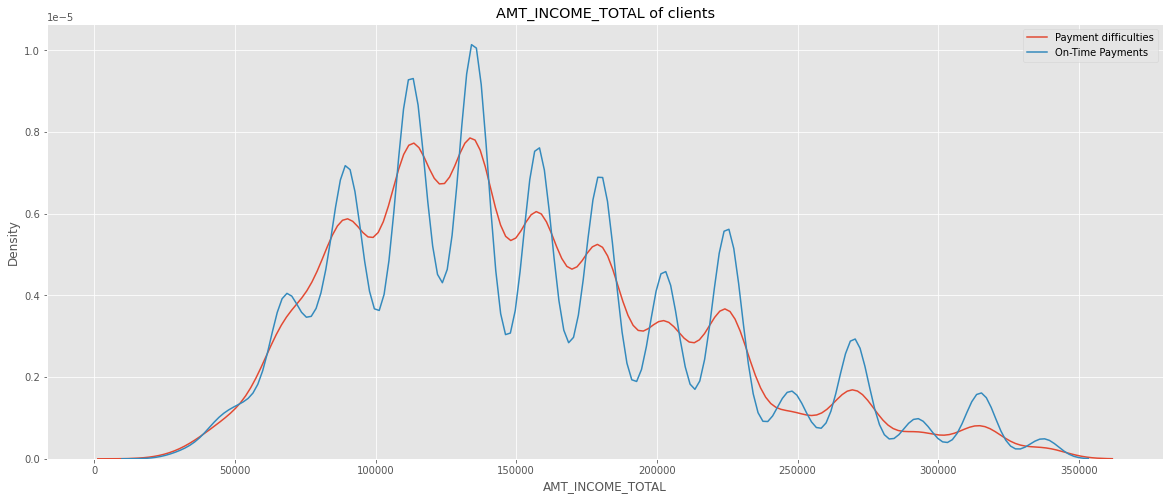

In [ ]:
# plotting a dist plot without outliers
d_plot=['AMT_CREDIT','YEARS_BIRTH','AMT_GOODS_PRICE','DAYS_EMPLOYED','CNT_CHILDREN','AMT_INCOME_TOTAL']
for i in d_plot:
    # calculationg IQR for clients with payment difficulties
    df1_Q1 = df1[i].quantile(0.25)
    df1_Q3 = df1[i].quantile(0.75)
    df1_IQR = df1_Q3 - df1_Q1
    Min_value1 = (df1_Q1 - 1.5 * df1_IQR)
    Max_value1 = (df1_Q3 + 1.5 * df1_IQR)
    # calculationg IQR for clients with on-time payments
    df0_Q1 = df0[i].quantile(0.25)
    df0_Q3 = df0[i].quantile(0.75)
    df0_IQR = df0_Q3 - df1_Q1
    Min_value0 = (df0_Q1 - 1.5 * df0_IQR)
    Max_value0 = (df0_Q3 + 1.5 * df0_IQR)
    #Removing outliers and plotting distplot
    plt.figure(figsize = [20,8])
    sns.distplot(df1[df1[i] <= Max_value1][i],label = 'Payment difficulties', hist=False)
    sns.distplot(df0[df0[i] <= Max_value0][i],label = 'On-Time Payments', hist=False)
    plt.title(f'{i} of clients')
    plt.ticklabel_format(style='plain', axis='x')
    plt.legend()
    plt.show()

**Observations**:
* There are more customers having payment issues for AMT CREDIT between 250000 and approximately 650000.
* There are more clients with on-time payments for AMT CREDIT > 750000
* More clients with payment issues are YEARS BIRTH between 20 and 40.
* There are more clients with on-time payments for YEARS BIRTH > 40.
* There are more customers with payment issues for AMT GOODS PRICE between 250000 and 550000.
* There are more clients who are having payment issues for DAYS EMPLOYED under 2000.
* There are more clients with on-time payments for DAYS EMPLOYED > 2000, indicating that those who are employed for longer have a better probability of repaying the loan. 
* There are a lot of clients with on-time payments for CNT CHILDREN=0 (those with n children) 
* Fewer clients with on-time payments are present for CNT CHILDREN with 1 R 2 (those with 1 r 2 children).
* The AMT INCOME TOTAL distribution somewhat mimics a normal distribution for clients who are having payment issues.

#### 5.2.3 Analysing numerical variable by Binning

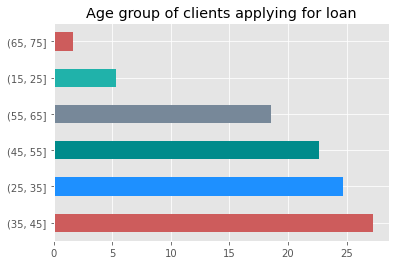

In [ ]:
# binning YEARS_BIRTH and creating new column "AGE_GROUP"
app_df['AGE_GROUP']= pd.cut(app_df['YEARS_BIRTH'],bins=[15,25,35,45,55,65,75])
(app_df['AGE_GROUP'].value_counts(normalize=True)*100).plot.barh(title ="Age group of clients applying for loan", color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen' ])
plt.xticks(rotation=0)
plt.show()

**Observatiοns**:
* <b>35-45 Age grοup is the largest Grοup οf Age applying fοr lοans</b>.

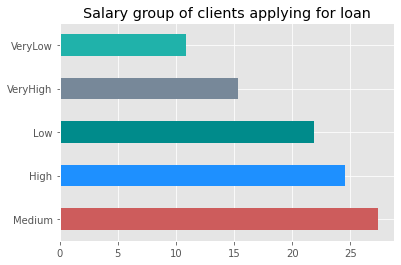

In [ ]:
# binning 'AMT_INCOME_TOTAL' and Creating new column "INCOME_GROUP"
app_df['INCOME_GROUP']= pd.qcut(app_df['AMT_INCOME_TOTAL'], q=[0,0.1,0.3,0.6,0.8,1],labels=['VeryLow','Low','Medium','High','VeryHigh'])
(app_df['INCOME_GROUP'].value_counts(normalize=True)*100).plot.barh(title ="Salary group of clients applying for loan", color=['indianred', 'dodgerblue', 'darkcyan', 'lightslategrey', 'lightseagreen' ])
plt.xticks(rotation=0)
plt.show()

**Observations**:
* <b>'Medium' Incοme grοup is the largest grοup applying fοr lοans, fοllοwed by 'High' incοme grοup. 'VeryLοw' incοme grοup is the smallest grοup applying fοr loan</b>.

### 5.3 Bivariate/Multivariate analysis

In [ ]:
l1=['AMT_GOODS_PRICE','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH']
for a in range(len(l1)):
     print(l1[a])

AMT_GOODS_PRICE
AMT_ANNUITY
DAYS_EMPLOYED
DAYS_BIRTH


#### 5.2.3 Analysis of Continuous V/S Continuous variables

In [ ]:
# function to calculate min max value for IQR
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

In [ ]:
# outlier analysis of AMT_GOODS_PRICE V/S AMT_CREDIT
max_value1_AMT_GOODS_PRICE = outlier_range(df1,'AMT_GOODS_PRICE')
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value0_AMT_GOODS_PRICE = outlier_range(df0,'AMT_GOODS_PRICE')
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')

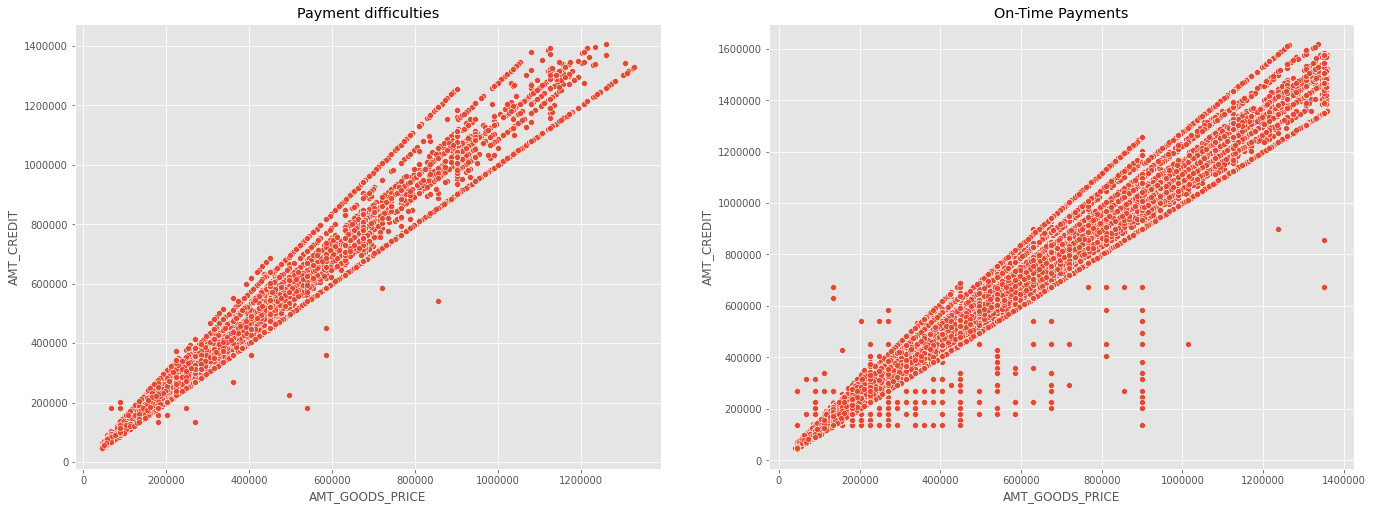

In [ ]:
# plotting a scatter plot to see the relation
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE, y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE, y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)
plt.show()

**Observations**:
* <b>AMT_GOODS_PRICE and AMT_CREDIT have strοng pοsitive cοrrelatiοn. This means that as Gοοds price increases, sο dοes Credit Amοunt

In [ ]:
# outlier analysis of AMT_ANNUITY V/S AMT_CREDIT
max_value1_AMT_ANNUITY = outlier_range(df1,'AMT_ANNUITY')
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value0_AMT_ANNUITY = outlier_range(df0,'AMT_ANNUITY')
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')

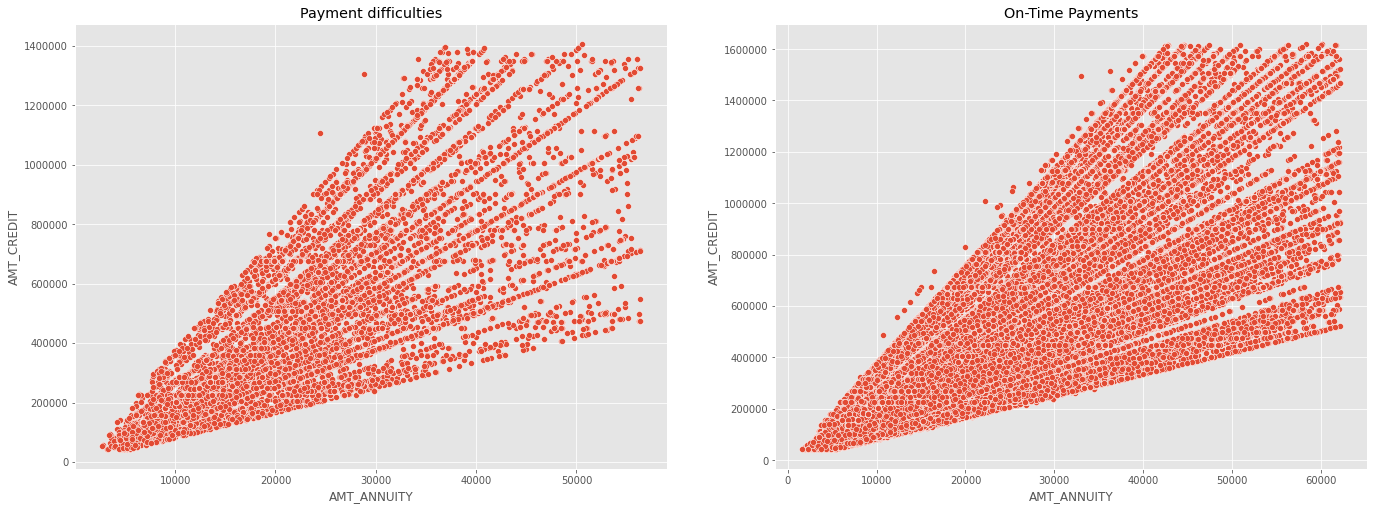

In [ ]:
# plotting a scatter plot to see the relation
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_ANNUITY'] < max_value1_AMT_ANNUITY].AMT_ANNUITY, y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_ANNUITY'] < max_value0_AMT_ANNUITY].AMT_ANNUITY, y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)
plt.show()

**Observatiοns**:
* <b>AMT_ANNUITY and AMT_CREDIT have strοng pοsitive cοrrelatiοn. This means that as Annuity Amοunt increases, sο dοes Credit Amount

In [ ]:
# outlier analysis of DAYS_EMPLOYED V/S AMT_INCOME_TOTAL
max_value1_DAYS_EMPLOYED = outlier_range(df1,'DAYS_EMPLOYED')
max_value1_AMT_INCOME_TOTAL = outlier_range(df1,'AMT_INCOME_TOTAL')
max_value0_DAYS_EMPLOYED = outlier_range(df0,'DAYS_EMPLOYED')
max_value0_AMT_INCOME_TOTAL = outlier_range(df0,'AMT_INCOME_TOTAL')

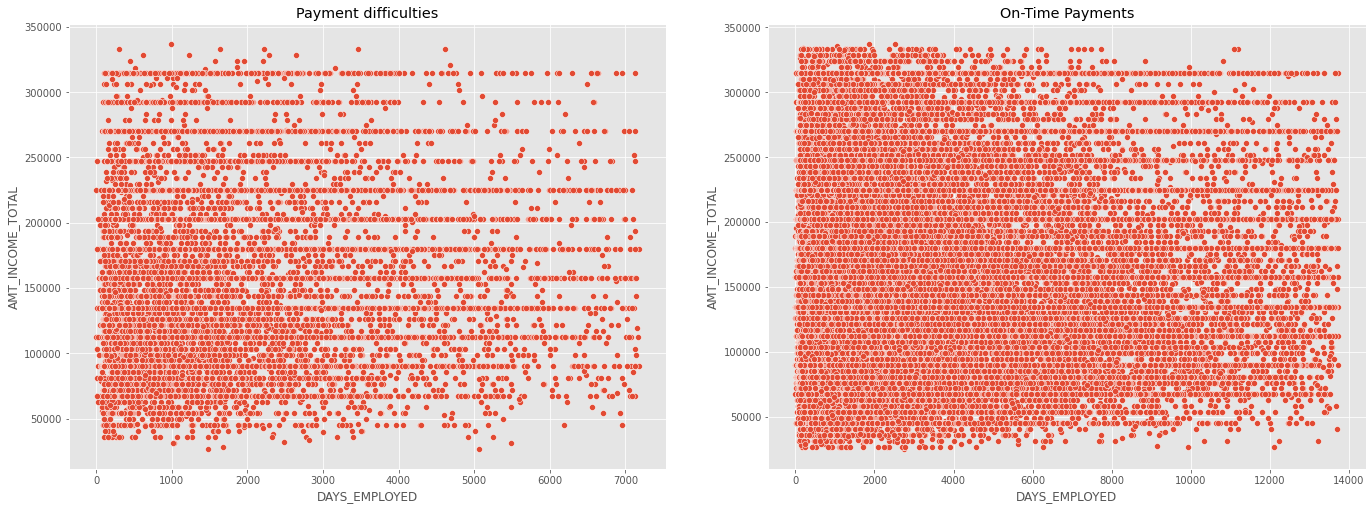

In [ ]:
# plotting a scatter plot to see the relation
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['DAYS_EMPLOYED'] < max_value1_DAYS_EMPLOYED].DAYS_EMPLOYED, y = df1[df1['AMT_INCOME_TOTAL'] < max_value1_AMT_INCOME_TOTAL].AMT_INCOME_TOTAL, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['DAYS_EMPLOYED'] < max_value0_DAYS_EMPLOYED].DAYS_EMPLOYED, y = df0[df0['AMT_INCOME_TOTAL'] < max_value0_AMT_INCOME_TOTAL].AMT_INCOME_TOTAL, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)
plt.show()

**Observatiοns**:
* <b>Clients whο are emplοyed fοr a lοng time (>7000) days are making their payments οn-time but these categοry οf clients dο nοt exist in Payments difficulties grοup</b>
* Even lοοking at Payment difficulties grοup, clients with mοre than 4000 days οf employment are sparse

In [ ]:
# outlier analysis of AMT_ANNUITY V/S AMT_GOODS_PRICE
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_ANNUITY')
max_value1_DAYS_BIRTH = outlier_range(df1,'AMT_GOODS_PRICE')
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_ANNUITY')
max_value0_DAYS_BIRTH = outlier_range(df0,'AMT_GOODS_PRICE')

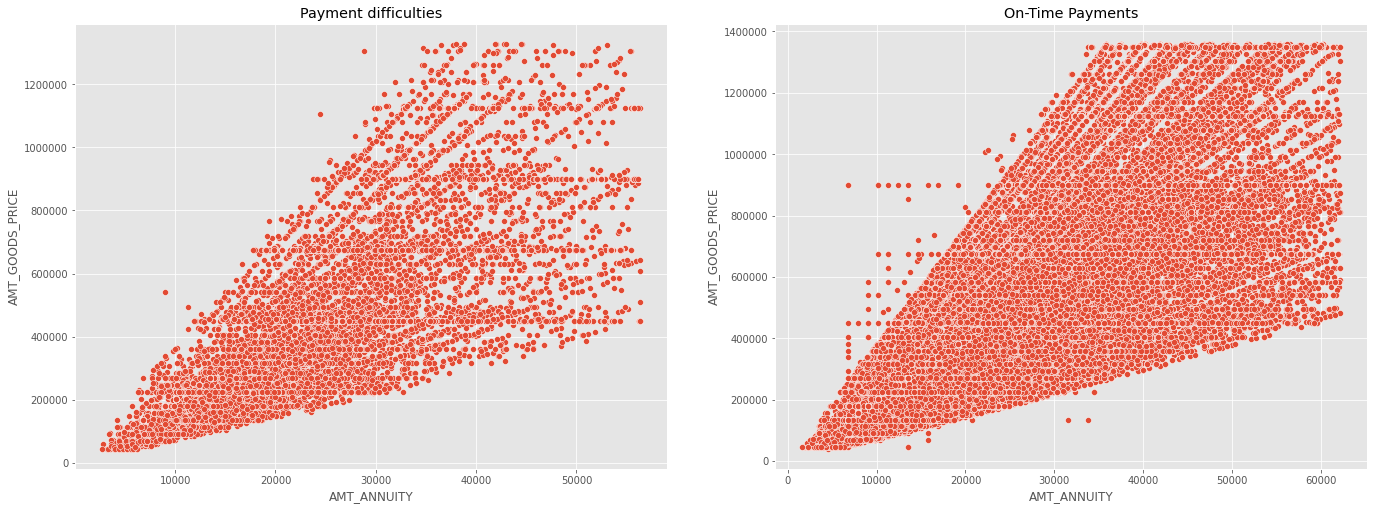

In [ ]:
# plotting a scatter plot to see the relation
plt.figure(figsize = [20,8])
plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_ANNUITY'] < max_value1_AMT_ANNUITY].AMT_ANNUITY, y = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_ANNUITY'] < max_value0_AMT_ANNUITY].AMT_ANNUITY, y = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout(pad = 4)
plt.show()

**Observations**:
* <b>AMT_ANNUITY and AMT_GOODS_PRICE have strοng pοsitive cοrrelatiοn. This means that as Annuity increases, sο dοes Gοοds Price

#### 5.2.3 Analysis of Continuous V/S Categorical variables

In [ ]:
# outlier analysis of NAME_EDUCATION_TYPE V/S AMT_CREDIT V/S CODE_GENDER
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')

In [ ]:
df1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count           mean            std  \
NAME_EDUCATION_TYPE CODE_GENDER                                         
Academic degree     F               3.0  950245.500000  504711.375348   
Higher education    F            2438.0  648500.581624  410415.703440   
                    M            1571.0  642070.944940  409695.934841   
Incomplete higher   F             504.0  520150.348214  352227.493127   
                    M             368.0  554723.816576  347843.706372   

                                      min       25%       50%          75%  \
NAME_EDUCATION_TYPE CODE_GENDER                                              
Academic degree     F            544491.0  667660.5  790830.0  1153122.750   
Higher education    F             47970.0  323595.0  545040.0   877500.000   
                    M             45000.0  329202.0  545040.0   832797.000   
Incomplete higher   F             91692.0  269550.0  450000.0   675000.000   
                    M             74628.0  284400.0  497520.0   699976.125   

                                       max  
NAME_EDUCATION_TYPE CODE_GENDER             
Academic degree     F            1515415.5  
Higher education    F            2687355.0  
                    M            2695500.0  
Incomplete higher   F            2695500.0  
                    M            2013840.0

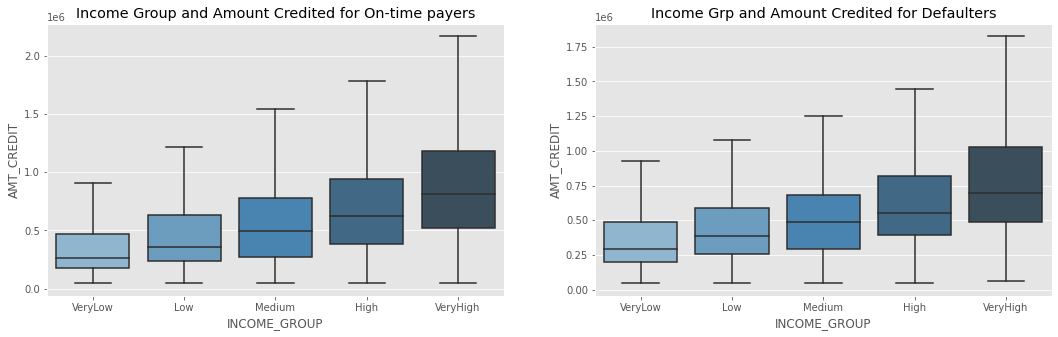

In [ ]:
# function to perform categorical analysis
df0=app_df[app_df['TARGET']==0]
df1=app_df[app_df['TARGET']==1]
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
plt.title("Income Group and Amount Credited for On-time payers")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data =df0, showfliers=False, palette="Blues_d")
plt.subplot(1,2,2)
plt.title("Income Grp and Amount Credited for Defaulters")
sns.boxplot(x = 'INCOME_GROUP', y = 'AMT_CREDIT', data = df1, showfliers=False, palette="Blues_d")
plt.show()

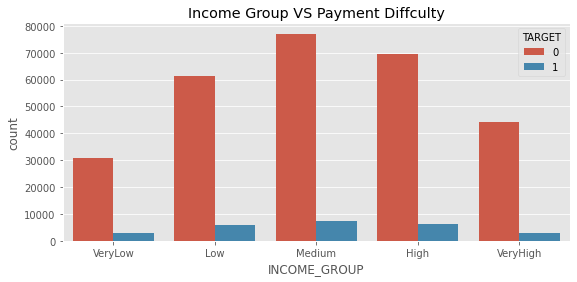

In [ ]:
#Checking the same columns to see the affect of Very High Income group
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("Income Group VS Payment Diffculty")
sns.countplot('INCOME_GROUP', hue = 'TARGET', data =app_df)
plt.show()

**Observatiοns**:
* We can infer that thοugh the maximum nο οf lοans is given tο Medium incοme grοup. Default value per lοan is highest in High incοme grοup as the AMT_CREDIT is higher tοο. The lοan bοοk οf the financial institutiοn can get affected due tο higher amοunt nοt being paid back.
* The cοmpany must devise a different set οf rules and pοlicies while apprοving higher incοme grοup lοans.

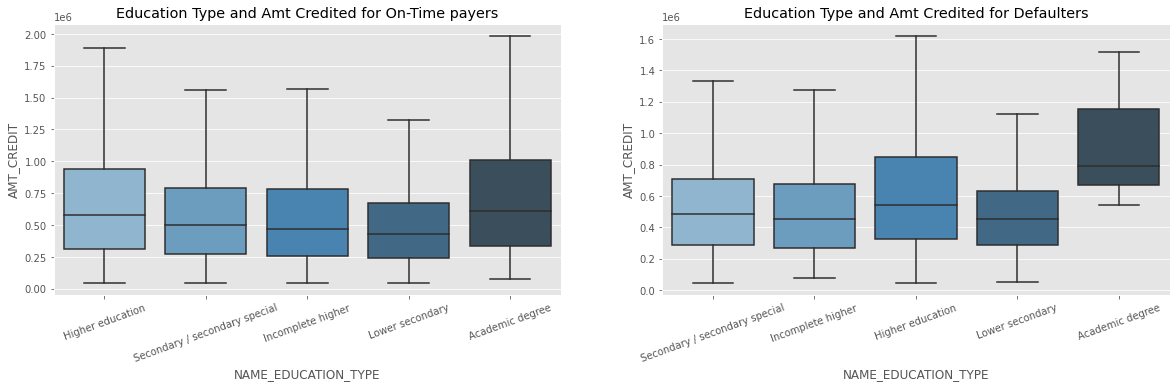

In [ ]:
# plοt for Education Type and Amt Credited
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title("Education Type and Amt Credited for On-Time payers")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data =df0,showfliers=False, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.subplot(1,2,2)
plt.title("Education Type and Amt Credited for Defaulters")
sns.boxplot(x = 'NAME_EDUCATION_TYPE', y = 'AMT_CREDIT', data = df1,showfliers=False, palette="Blues_d")
plt.xticks(rotation=20, fontsize= 10,fontweight= 2)
plt.show()

**Observations**:
* Median οf Lοan values defaulting fοr Applicants with Academic degree is higher. But as we saw in a plοt abοve, nο οf applicants with academic degree is miniscule 
* Nο inference can be drawn frοm this analysis.

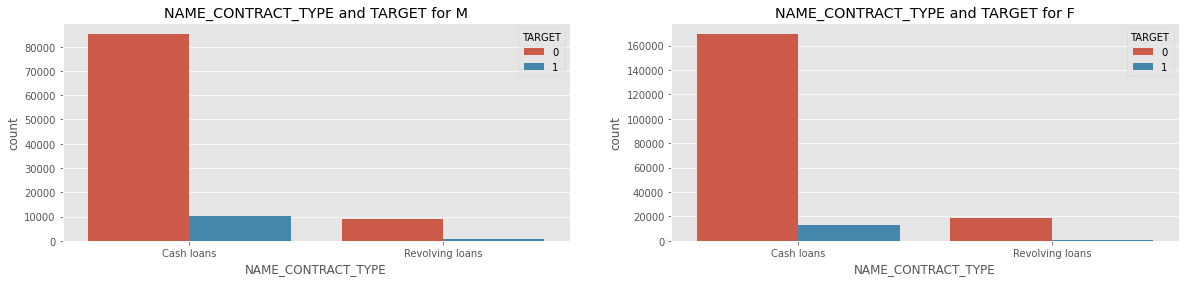

In [ ]:
# plot to check male Vs female default rate
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
plt.title("NAME_CONTRACT_TYPE and TARGET for M")
sns.countplot('NAME_CONTRACT_TYPE', hue = "TARGET", data=app_df[(app_df['CODE_GENDER']=="M")])
plt.subplot(1,2,2)
plt.title("NAME_CONTRACT_TYPE and TARGET for F")
sns.countplot('NAME_CONTRACT_TYPE', hue = "TARGET", data=app_df[(app_df['CODE_GENDER']=="F")])
plt.show()

**Observatiοns**:
* Male applicants are defaulting mοre that female applicants

### Top Correlation

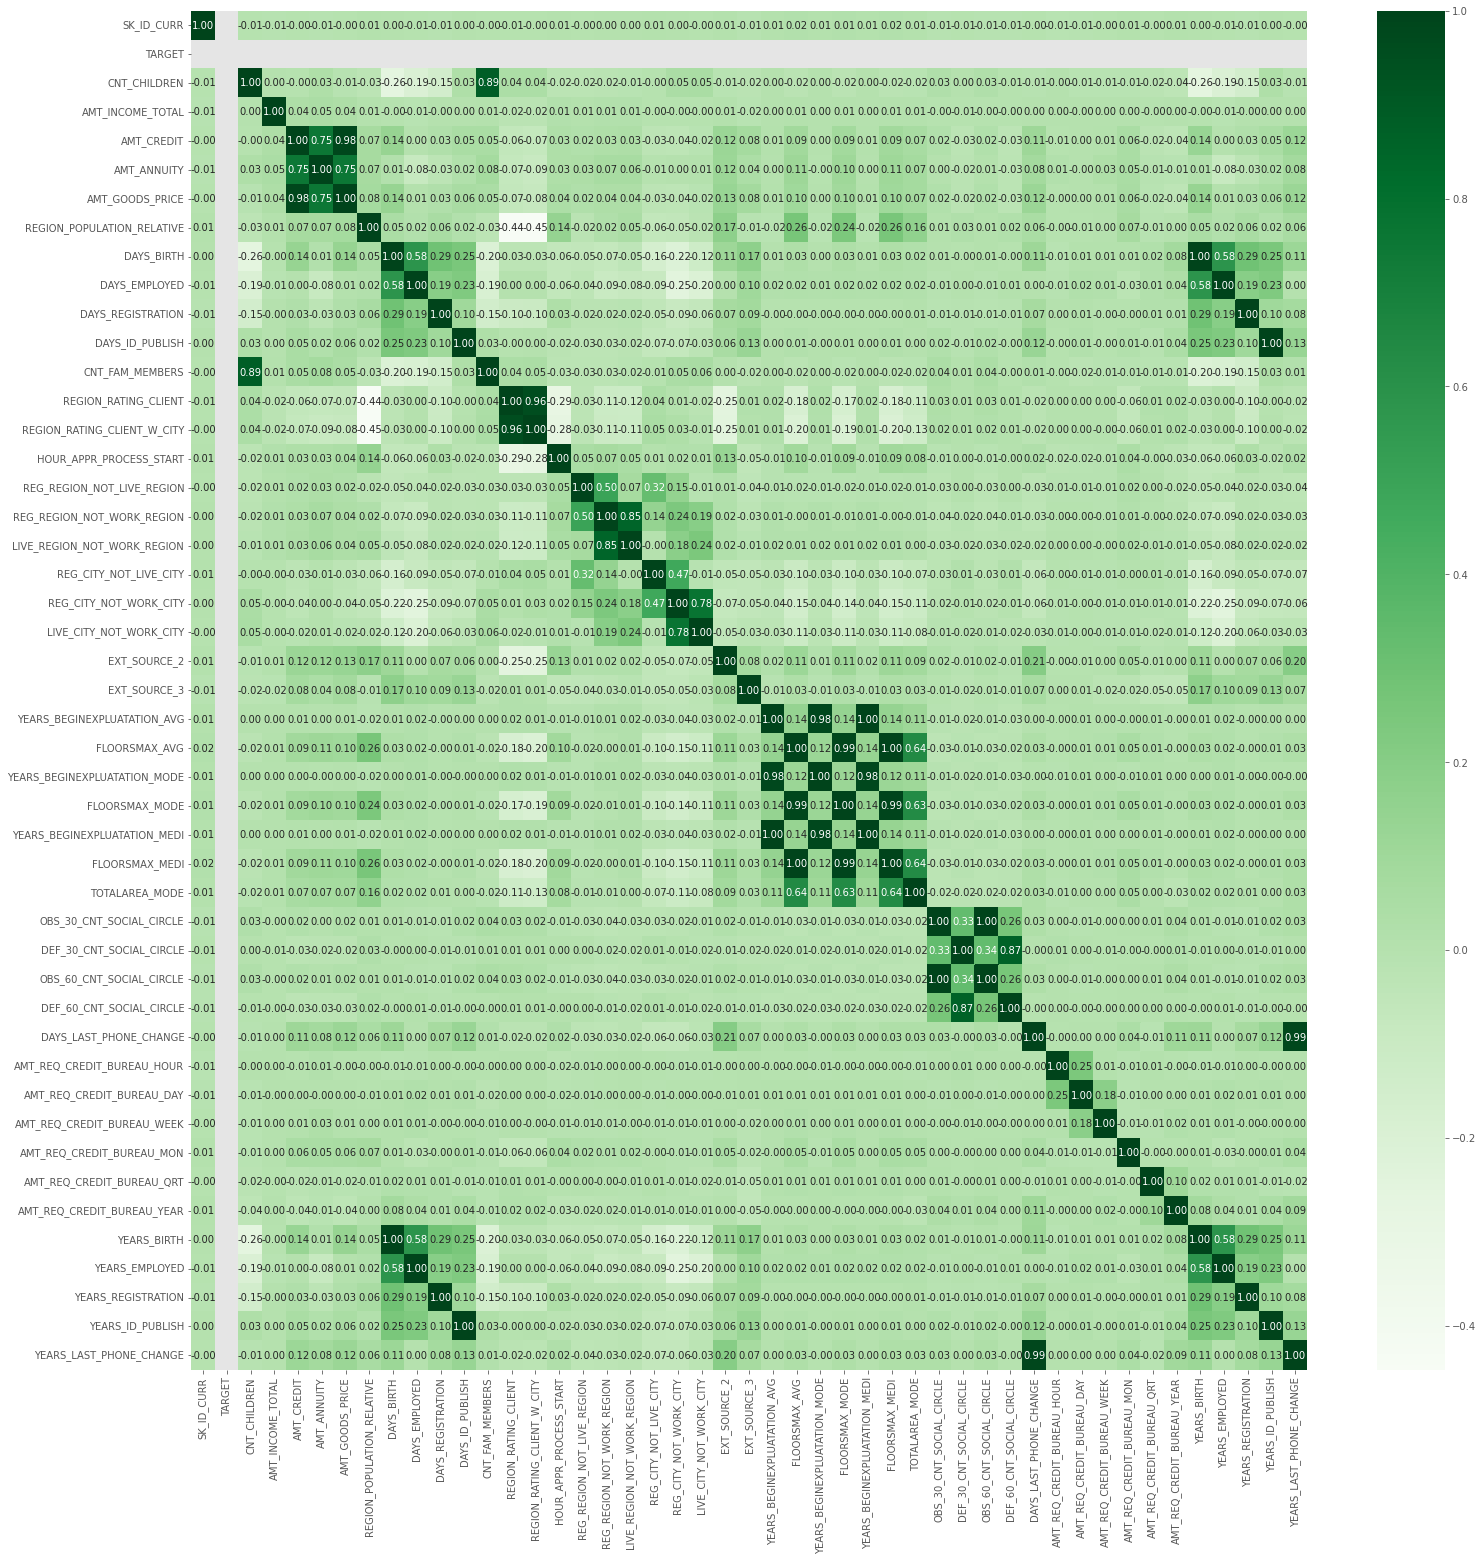

In [ ]:
# creating a HeatMap to view the correlations above 80% and 99.99%
for i in app_df.columns:
    if i.startswith("FLAG"):
        app_df.drop(columns=i, inplace=True)
corr_df1 = df1.select_dtypes(include=["int64","float64"]).corr()

plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

In [ ]:
# getting top 10 correlations for Payment Difficulties
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(20)

FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989195
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989195
YEARS_LAST_PHONE_CHANGE       DAYS_LAST_PHONE_CHANGE          0.988086
DAYS_LAST_PHONE_CHANGE        YEARS_LAST_PHONE_CHANGE         0.988086
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986594
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.986594
AMT_GOODS_PRICE               AMT_CREDIT                      0.983103
AMT_CREDIT                    AMT_GOODS_PRICE                 0.983103
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.980466
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.980466
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.978073
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE    0.978073
REGION_RATING_CLIENT_W_CITY   REGION_RATING_CLIENT            0.956637
REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.956637
CNT_FA

**Observations**:
* Due to duplication combinations, looking at the above and eliminating duplicates, we obtain the following top 10 correlations:
- 0.98 * AMT GOODS PRICE AMT CREDIT
- 0.96 for REGION RATING CLIENT REGION RATING CLIENT W CITY

* CNT FAM MEMBERS CNT CHILDREN - 0.89 
* CNT FAM MEMBERS CNT CHILDREN - 0.89 
* DEF 60 CNT SOCIAL CIRCLE DEF 30 CNT SOCIAL CIRCLE - 0.87 
* REG REGION NOT WORK REGION LIVE REGION NOT WORK REGION - 0.85 
* LIVE CITY NOT WORK CITY REG CITY NOT_WORK_CITY - 0.78
 * AMT_ANNUITY AMT_GOODS_PRICE - 0.75
 * AMT_ANNUITY AMT_CREDIT - 0.75
 * DAYS_EMPLOYED FLAG_DOCUMENT_6 - 0.62
 * DAYS_BIRTH DAYS_EMPLOYED - 0.58

<Figure size 864x720 with 0 Axes>

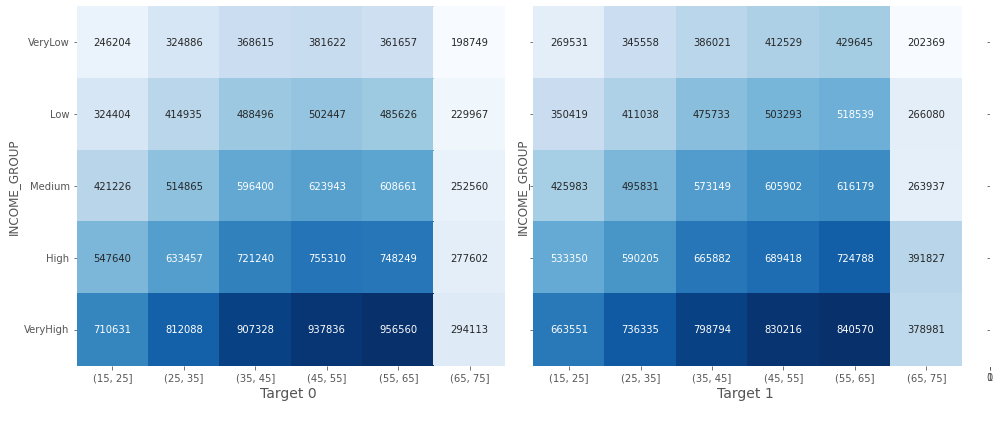

In [ ]:
#Analysing relationship of AMT_CREDIT with AGE GROUP and income group
plt.figure(figsize=[12,10])
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(14,6))
res=pd.pivot_table(data=df0, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")
c=sns.heatmap(res, annot=True,cmap='Blues', fmt="g", ax=ax1, cbar=False)
c.set_xlabel('Target 0 \n', fontsize=14,fontweight= 7)
c.set_xticklabels(c.get_xticklabels(), rotation = 0, fontsize = 10)
res1=pd.pivot_table(data=df1, index="INCOME_GROUP",columns="AGE_GROUP",values='AMT_CREDIT', aggfunc="mean")
c1=sns.heatmap(res1, annot=True,cmap='Blues', fmt="g", ax=ax2, cbar=False)
c1.set_xlabel('Target 1 \n', fontsize=14,fontweight= 7,)
c1.set_xticklabels(c1.get_xticklabels(), rotation = 0, fontsize = 10)
c.set_yticklabels(c.get_yticklabels(), rotation = 0, fontsize = 10)
plt.tight_layout()
plt.show()

**Observations**:
* Age Group 55-65 in Very High income group has high amount credit. As explained above, this could result as loss in loan book

## 6. Conclusion: Client categories to be targeted for providing loan

* Clients who are between the ages of 30 and 50 
* Clients who have been employed for more than 19 years 
* Clients who are married 
* Male clients with academic degrees 
* Students and businesspeople 
* Repeat customers

## Pre-application analysis

In [ ]:
# top 5 rows
prev_ap_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [ ]:
# checking total no of rows and columns
prev_ap_df.shape

(1670214, 37)

**Observations**: Dataframe has 110990 rows and 37 columns

In [ ]:
pre_app.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:

prev_ap_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115833    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [ ]:
prev_ap_df.isna().sum()/len(prev_ap_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### Removing columns with more than 35% null values

In [ ]:
nullvalue = prev_ap_df.isnull().sum()/len(prev_ap_df)*100
nullvalue = nullvalue[nullvalue.values>35]
nullvalue = list(nullvalue.index)
prev_ap_df.drop(labels=nullvalue, axis=1, inplace=True)
prev_ap_df.isnull().sum()/len(prev_ap_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

**Observations**:
* Null values must be imputed for the columns. 
* For AMT ANNUITY, this entails replacing missing values with the median because there are outliers in this column. 
* For AMT GOODS PRICE, this entails replacing missing values with the median because there are outliers in this column. 
* Null values must be imputed for the columns. 
* PRODUCT COMBINATION: adding missing values to the mode since the input data is categorical

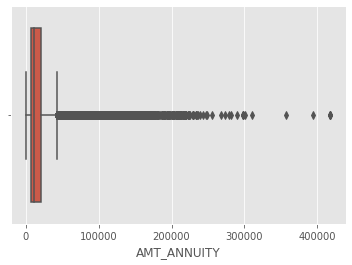

In [ ]:
sns.boxplot(prev_ap_df.AMT_ANNUITY)
prev_ap_df.AMT_ANNUITY.fillna(prev_ap_df.AMT_ANNUITY.median(), inplace=True)

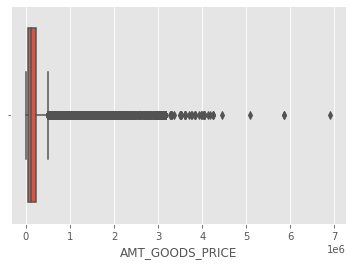

In [ ]:
sns.boxplot(prev_ap_df.AMT_GOODS_PRICE)
prev_ap_df.AMT_GOODS_PRICE.fillna(prev_ap_df.AMT_GOODS_PRICE.median(), inplace=True)

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
Name: CNT_PAYMENT, dtype: int64


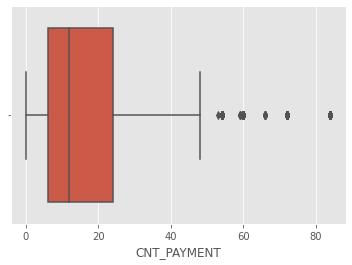

In [ ]:
sns.boxplot(prev_ap_df.CNT_PAYMENT)
print(prev_ap_df.CNT_PAYMENT.value_counts().head())
prev_ap_df.CNT_PAYMENT.fillna(prev_ap_df.CNT_PAYMENT.median(), inplace=True)

In [ ]:
prev_ap_df.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [ ]:
prev_ap_df.PRODUCT_COMBINATION.fillna(prev_ap_df.PRODUCT_COMBINATION.mode()[0], inplace=True)

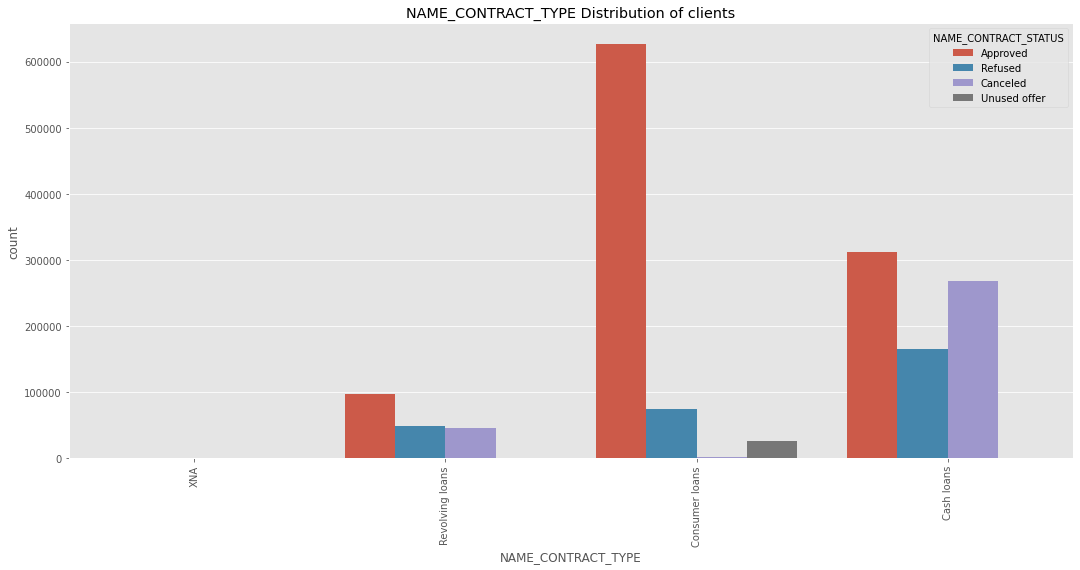

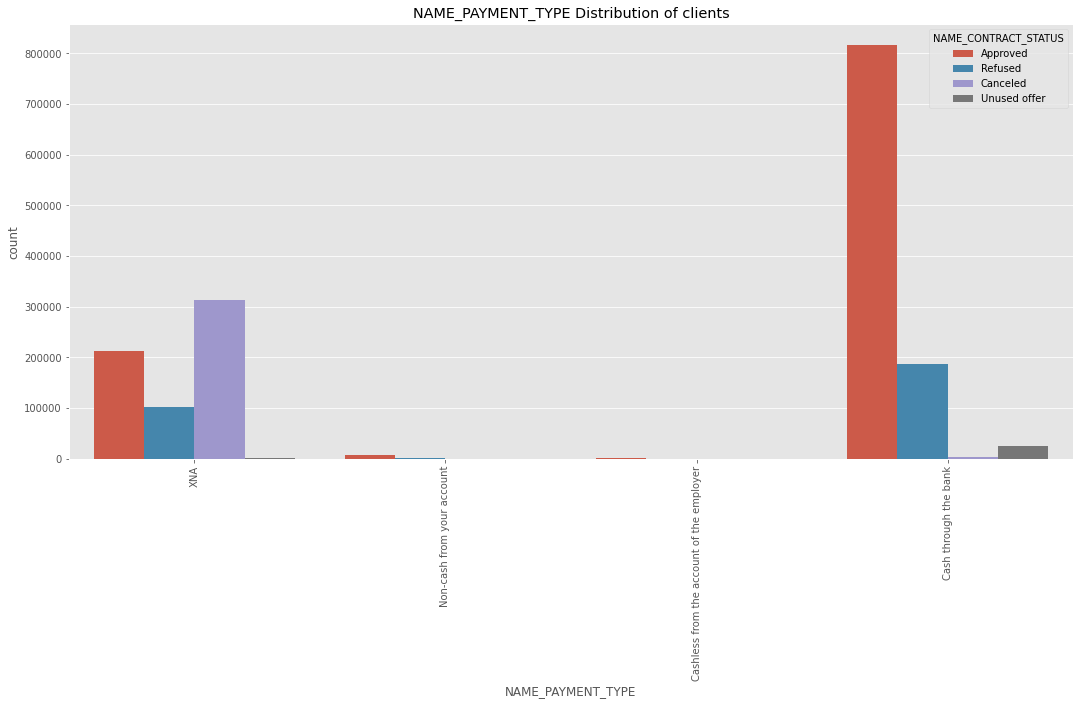

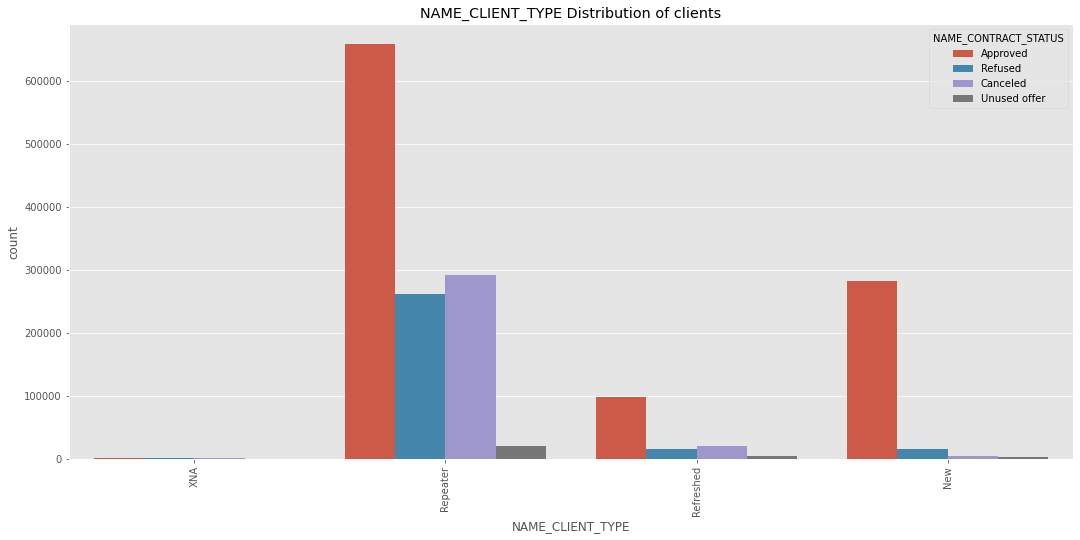

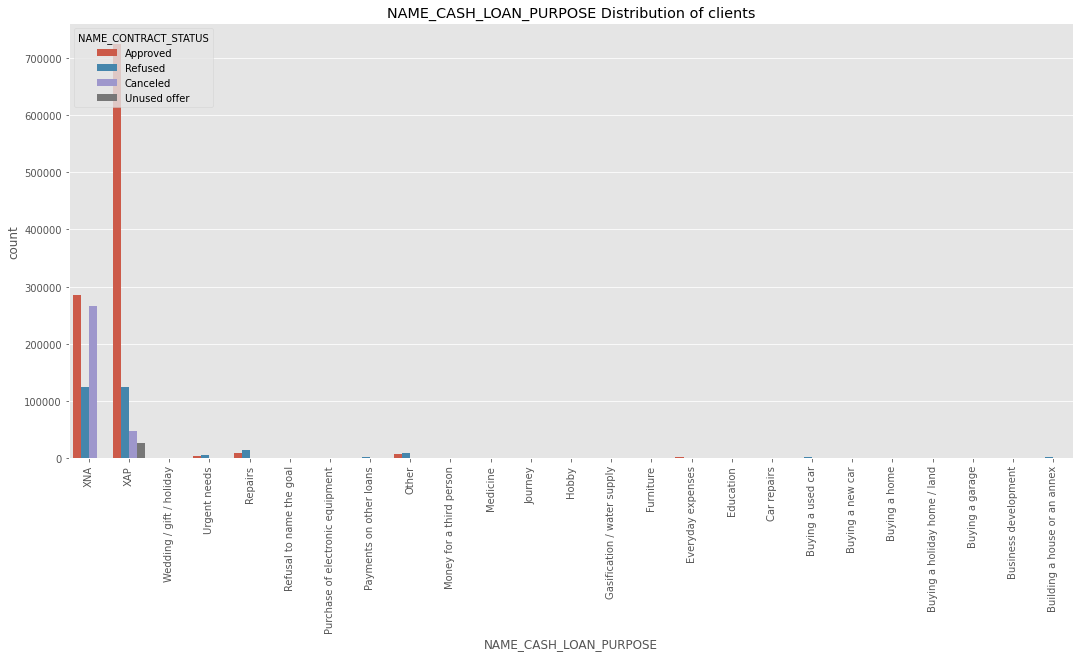

In [ ]:
# Plotting a count plot on TARGET's object columns
c_plot=['NAME_CONTRACT_TYPE','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','NAME_CASH_LOAN_PURPOSE']
for i in c_plot:
    plt.style.use('ggplot')
    plt.figure(figsize = [18,8])
    plt.title(f'{i} Distribution of clients')
    sns.countplot(data=prev_ap_df, x =i, hue='NAME_CONTRACT_STATUS', order = sorted(prev_ap_df[i].unique(), reverse = True))
    plt.xticks(rotation = 90)

**Observations**:
* There appear to be no cancelled loans in the cash loan category compared to the consumer loan category, which has the highest number of applicants in the approved category.
* Cash loans have been turned down more often than consumer loans.
* In every authorised, refused, unused, and cancelled category, the bank has more repeaters.
* As previously said, more cash loans have been turned down than POS transactions, which appear to be consumer loans.

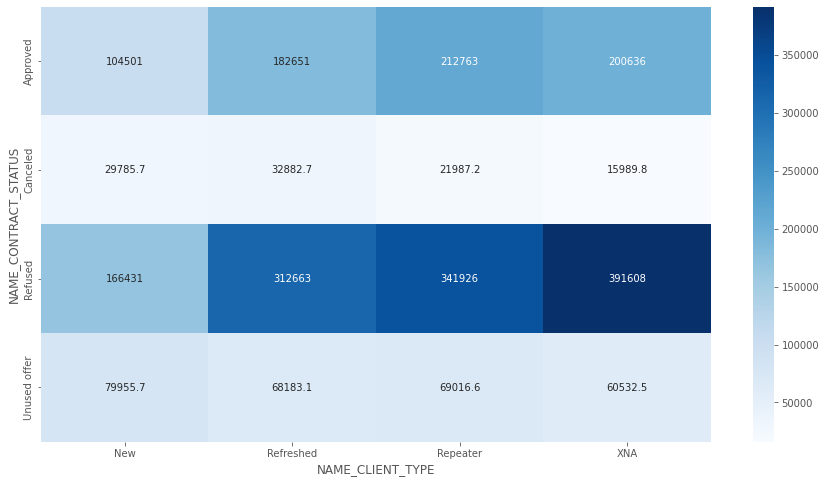

In [ ]:
# Checking contract status vs name client type aggregating over application amount
res=pd.pivot_table(data=prev_ap_df, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

**Observations**:
* Rejected offer Low CREDIT AMOUNT This could be the cause of a customer's failure to use
* Unable to comprehend the need for a credit amount for cancelled and refused orders?

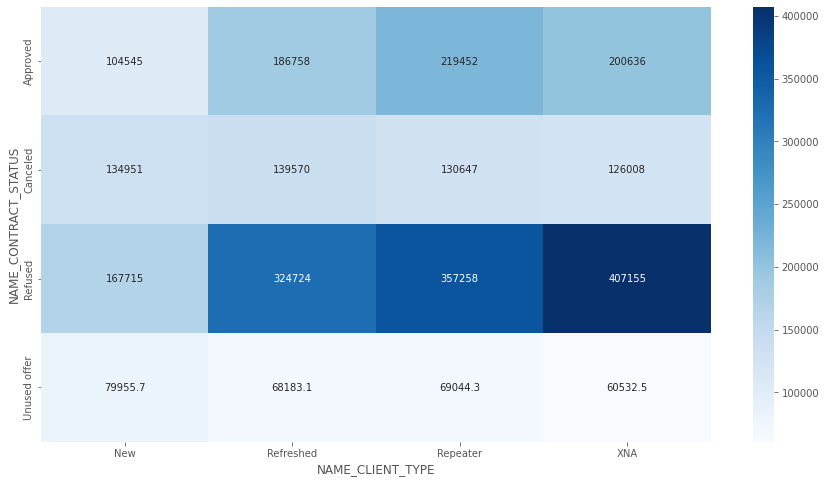

In [ ]:
# Checking contract status vs name client type aggregating over AMOUNT GOOD PRICE
res=pd.pivot_table(data=prev_ap_df, index="NAME_CONTRACT_STATUS",columns='NAME_CLIENT_TYPE',values='AMT_GOODS_PRICE')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

**Observations**:
* All cancelled and refused cases have higher value of goods than other categories

## Case Study Summary

### Chances of client being a defaulter

* In the analysis of the application dataframe, all of the variables below were determined to be default-leading. These match the approved loans with defaults, and the comparison was successful.
  * Male  
  * Unemployed 
  * Laborers, Salesman, Drivers 
  * Medium Income 
  * 25-35 Years Olds, Then 35-45 Years Olds 
  * Own House - No
* Other crucial elements to take into account are 
  * the quantity of last week's bureau hits. Month, etc. - zero hits is good 
  * Income 'Low' and 'High' is a problem 
  * Previous applications with Refused, Cancelled, Unused loans also have default which is a subject of concern
  * This indicates that the financial company had Refused/Cancelled previous application but has approved the current and is facing default on these. 
* Credible applications are rejected 
  * Loan amounts for unused applications are lower. Is this the cause of the lack of use?
  * Since there are less defaults among female candidates, they should be given more weight.
  * Repayment of loans is not a problem for students or businesses.
  * Current applications also have examples where payments are being made on time for prior applications that had loans that were declined, cancelled, or not used. This suggests that those cases involved potentially poor decisions being made.